# Analysis:

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
from pandas.plotting import scatter_matrix
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('fivethirtyeight')
df = pd.read_csv('../data/df_for_analysis.csv').drop(
    columns=['Unnamed: 0', 'date', 'white_elo', 'black_elo',
             'start_time', 'white_max_move', 'black_max_move',
             'elo', 'opp_elo', 'elo_delta'])
df = df.replace(np.inf, 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 22 columns):
result            2159 non-null float64
game_time         2159 non-null int64
end_time          2159 non-null float64
num_moves         2159 non-null int64
color             2159 non-null int64
won_by            2159 non-null int64
weekday           2159 non-null int64
day               2159 non-null int64
castled_on        2159 non-null int64
opp_castled_on    2159 non-null int64
castled           2159 non-null int64
opp_castled       2159 non-null int64
time_used         2159 non-null int64
opp_time_used     2159 non-null int64
opp_num_moves     2159 non-null int64
avg_time          2159 non-null float64
opp_avg_time      2158 non-null float64
max_move          2159 non-null float64
opp_max_move      2159 non-null float64
post_elo          2159 non-null int64
opp_post_elo      2159 non-null int64
diff              2159 non-null int64
dtypes: float64(6), int64(16)
memory usage: 3

In [2]:
df.columns

Index(['result', 'game_time', 'end_time', 'num_moves', 'color', 'won_by',
       'weekday', 'day', 'castled_on', 'opp_castled_on', 'castled',
       'opp_castled', 'time_used', 'opp_time_used', 'opp_num_moves',
       'avg_time', 'opp_avg_time', 'max_move', 'opp_max_move', 'post_elo',
       'opp_post_elo', 'diff'],
      dtype='object')

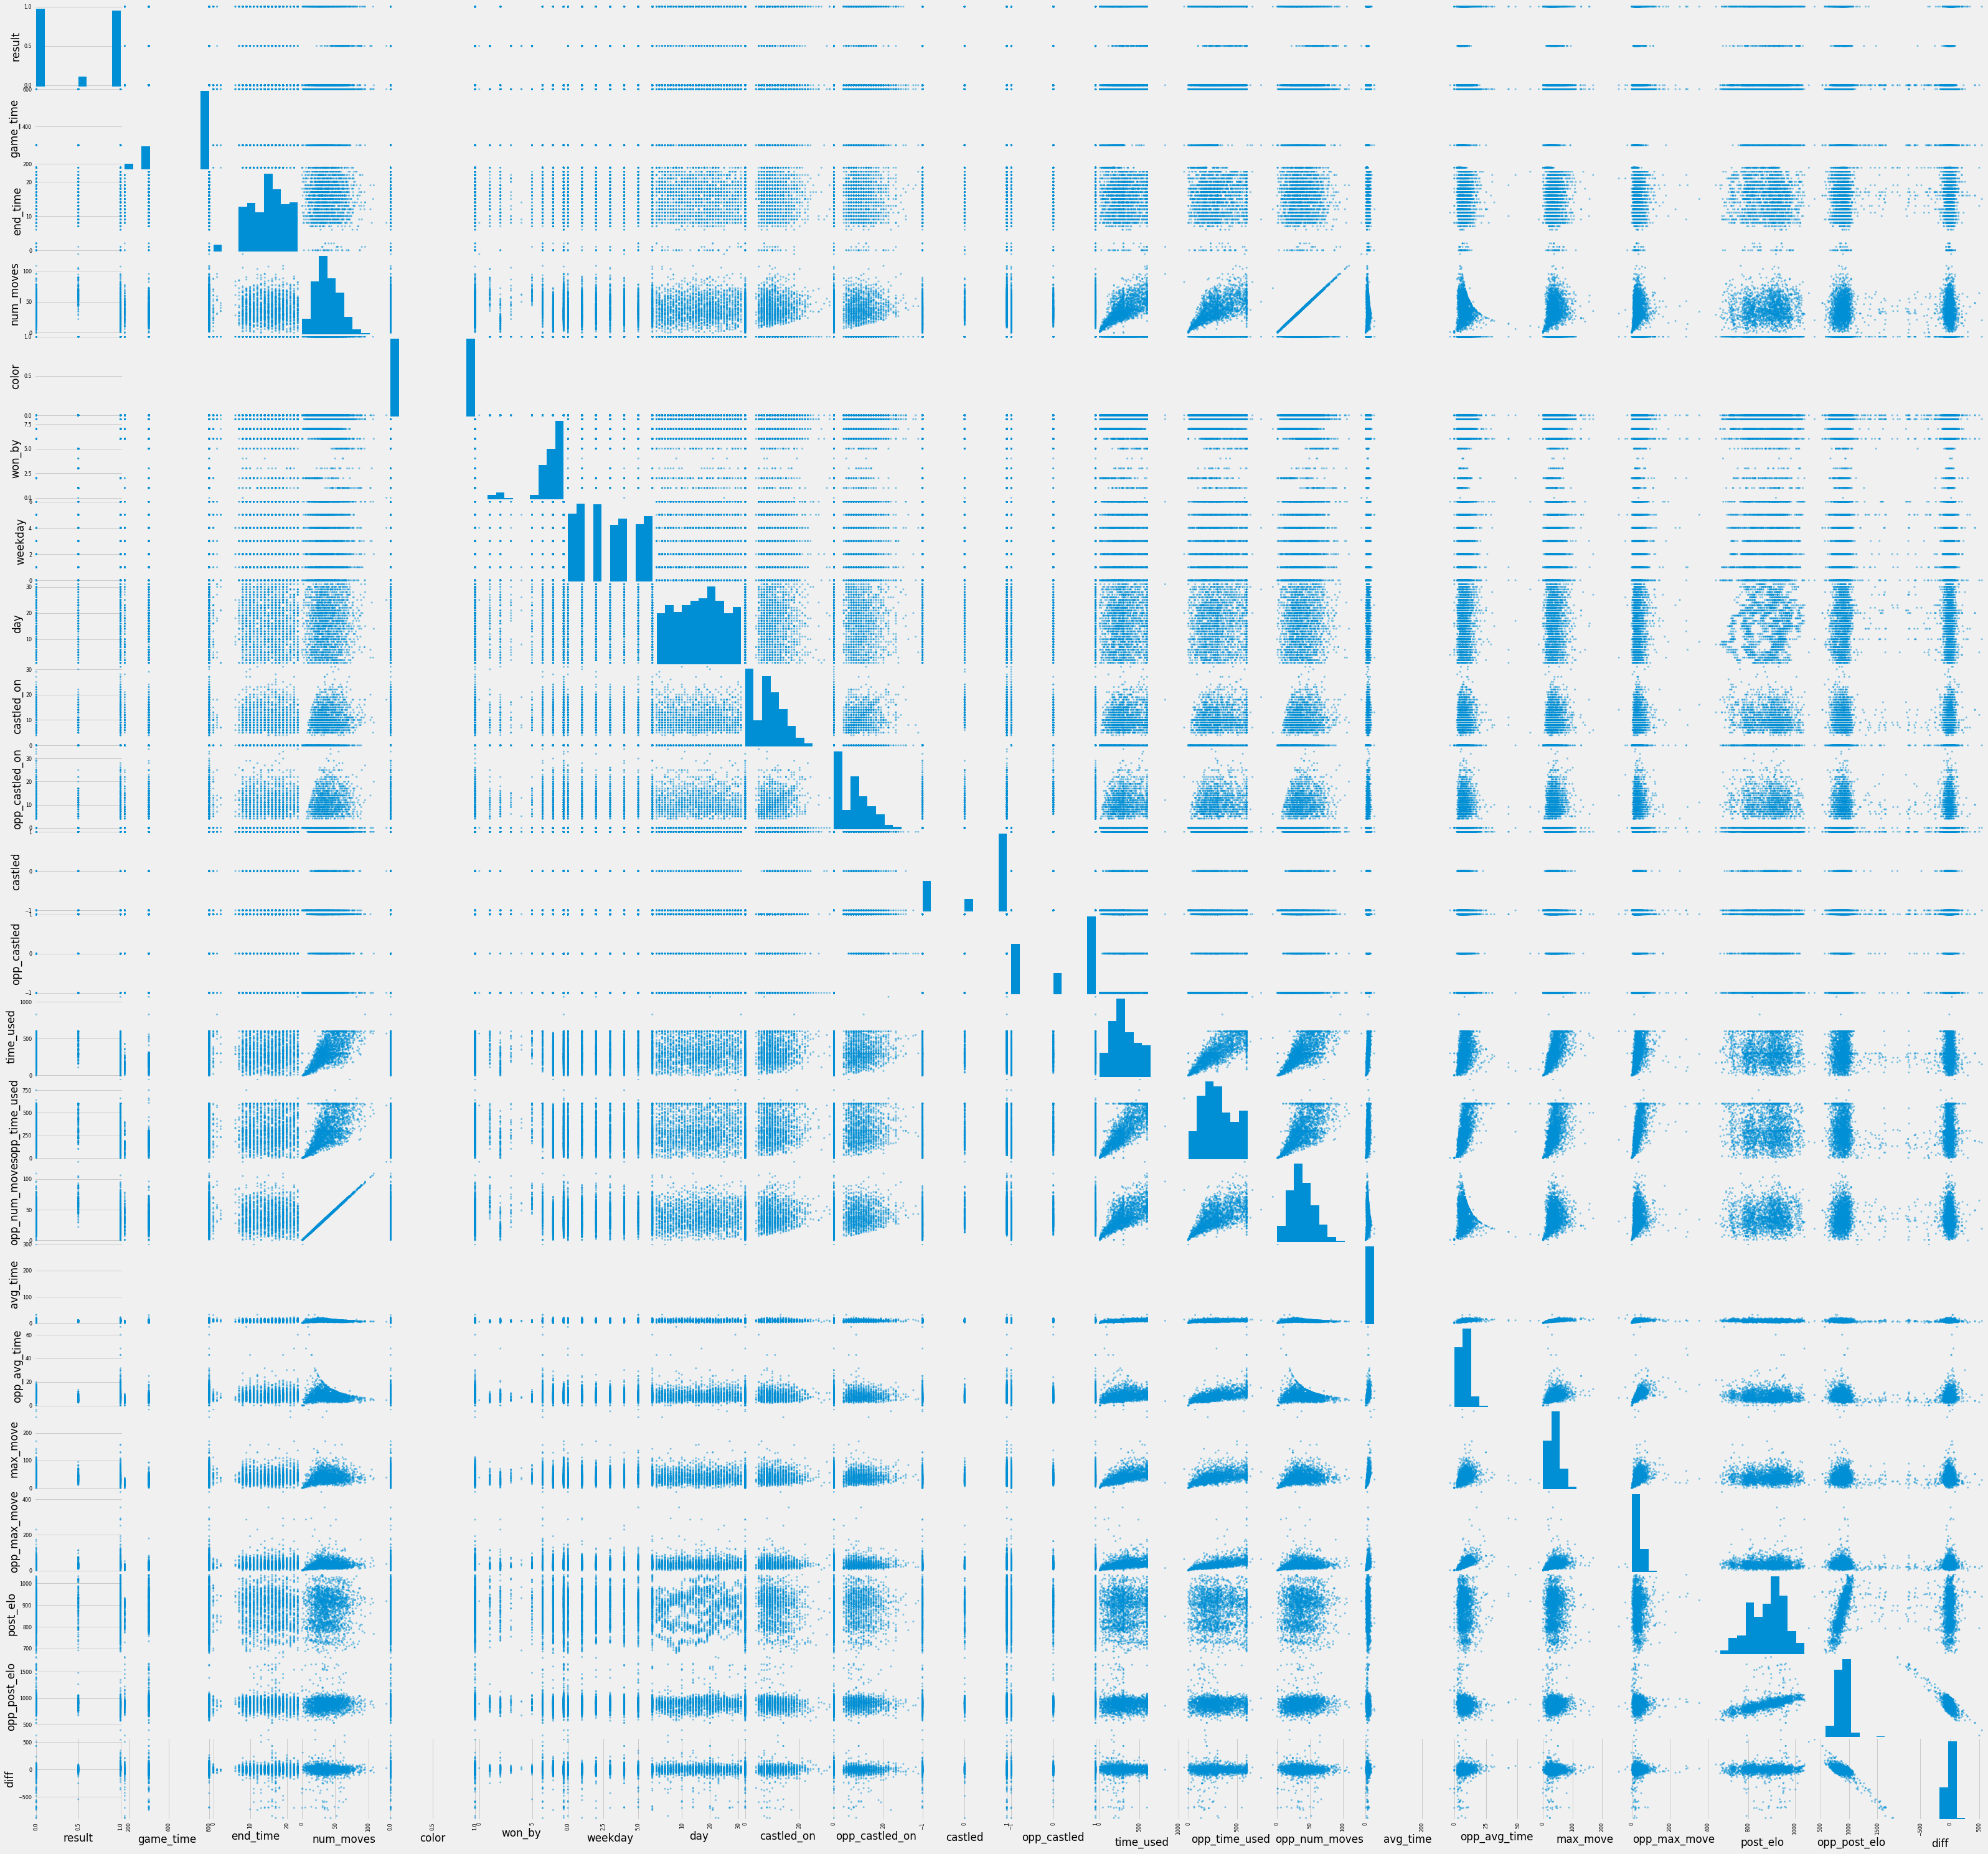

In [25]:
scatter_matrix(df, figsize=(50,50))
plt.savefig('scatter_matrix.png')
plt.show()

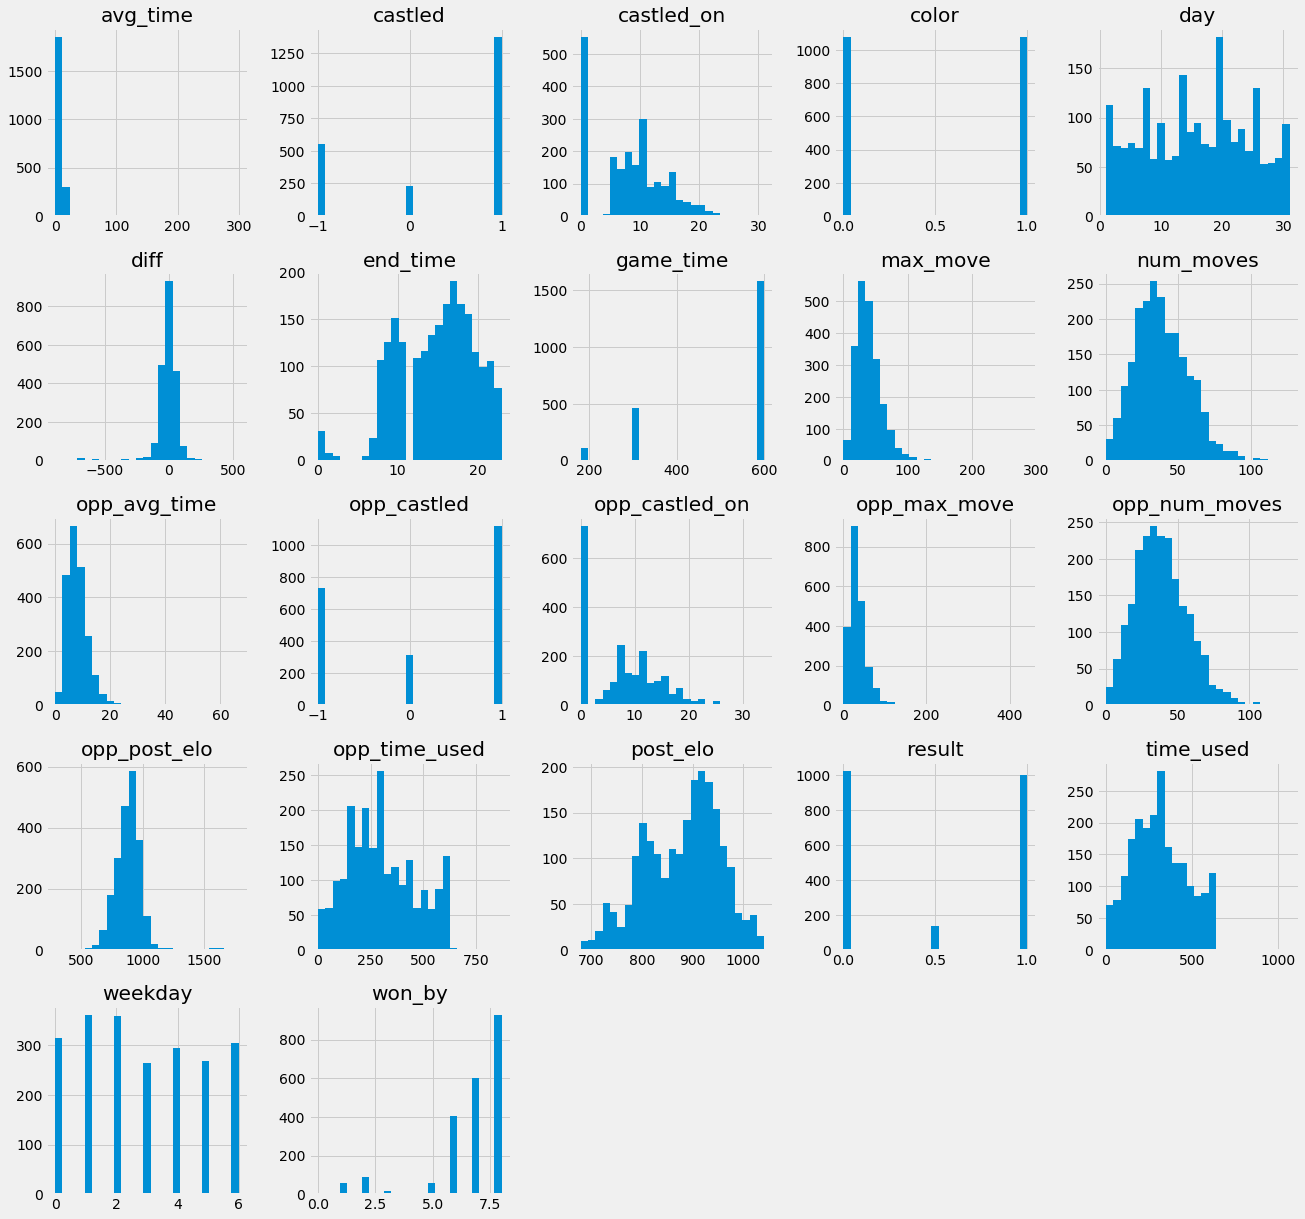

In [30]:
df.hist(bins=25, figsize=(20,20))
plt.show()

### Group values in all columns to get max 50 unique values

In [32]:
for num in df.columns:
    a = df[num].nunique()
    if a>=50:
        b = df[num].min()
        c = df[num].max()
        d = df[num].median()
        e = (c-b)
        print(num)
        print(f'unique_values = {a}')
        print(f'min = {b}')
        print(f'max = {c}')
        print(f'median = {d}')
        print(f'at split of 5, you need: {e/5} bins, \nat split of 10, you need: {e/10} bins')
        print(f'at split of 25 you need: {e/25} bins \nat split of 50, you need: {e/50} bins')
        print('-------------------------------------------------------------------------------------------')

num_moves
unique_values = 100
min = 0
max = 127
median = 37.0
at split of 5, you need: 25.4 bins, 
at split of 10, you need: 12.7 bins
at split of 25 you need: 5.08 bins 
at split of 50, you need: 2.54 bins
-------------------------------------------------------------------------------------------
time_used
unique_values = 63
min = 0
max = 1070
median = 300.0
at split of 5, you need: 214.0 bins, 
at split of 10, you need: 107.0 bins
at split of 25 you need: 42.8 bins 
at split of 50, you need: 21.4 bins
-------------------------------------------------------------------------------------------
opp_time_used
unique_values = 66
min = 0
max = 870
median = 290.0
at split of 5, you need: 174.0 bins, 
at split of 10, you need: 87.0 bins
at split of 25 you need: 34.8 bins 
at split of 50, you need: 17.4 bins
-------------------------------------------------------------------------------------------
opp_num_moves
unique_values = 99
min = 0
max = 128
median = 37.0
at split of 5, you need: 25.6 

### Group the following columns:
1. num_moves
    - total = 26
    - each_bin_range = 5
2. opp_num_moves
    - total = 43
    - each_bin_range = 25 
3. time_used
    - total = 
    - each_bin_range = 25 
4. opp_time_used
    - total = 
    - each_bin_range = 25
5. avg_time
    - total = 
    - each_bin_range = 5
6. opp_avg_time
    - total = 
    - each_bin_range = 5 
7. max_move
    - total = 
    - each_bin_range = 5
8. opp_max_move
    - total = 
    - each_bin_range = 5
9. post_elo
    - total = 
    - each_bin_range = 5 
10. opp_post_elo
    - total = 
    - each_bin_range = 5 
11. elo_diff
    - total = 58
    - each_bin_range = 25 

In [33]:
# df['num_moves'] = df['']
# df['castled_on'] = 
# df['opp_castled_on'] = 
# df['time_used'] = 
# df['opp_time_used'] = 
# df['opp_num_moves'] = 
# df['avg_time'] = 
# df['opp_avg_time'] = 
# df['max_move'] = 
# df['opp_max_move'] = 
# df['post_elo'] = 
# df['opp_post_elo'] = 
# df['time_used'] = 
# df['diff'] = 
# df['castled_on'] = 
# df['opp_castled_on'] = 

In [34]:
df_result_mn = df.groupby(by=['result']).mean()
df_game_time_mn = df.groupby(by=['game_time']).mean()
df_end_time_mn = df.groupby(by=['end_time']).mean()
df_num_moves_mn = df.groupby(by=['num_moves']).mean()
df_color_mn = df.groupby(by=['color']).mean()
df_won_by_mn = df.groupby(by=['won_by']).mean()
df_weekday_mn = df.groupby(by=['weekday']).mean()
df_day_mn = df.groupby(by=['day']).mean()
df_castled_on_mn = df.groupby(by=['castled_on']).mean()
df_opp_castled_on_mn = df.groupby(by=['opp_castled_on']).mean()
df_castled_mn = df.groupby(by=['castled']).mean()
df_opp_castled_mn = df.groupby(by=['opp_castled']).mean()
df_time_used_mn = df.groupby(by=['time_used']).mean()
df_opp_time_used_mn = df.groupby(by=['opp_time_used']).mean()
df_opp_num_moves_mn = df.groupby(by=['opp_num_moves']).mean()
df_avg_time_mn = df.groupby(by=['avg_time']).mean()
df_opp_avg_time_mn = df.groupby(by=['opp_avg_time']).mean()
df_max_move_mn = df.groupby(by=['max_move']).mean()
df_opp_max_move_mn = df.groupby(by=['opp_max_move']).mean()
df_post_elo_mn = df.groupby(by=['post_elo']).mean()
df_opp_post_elo_mn = df.groupby(by=['opp_post_elo']).mean()
df_diff_mn = df.groupby(by=['diff']).mean()

In [35]:
df_result_mdn = df.groupby(by=['result']).median()
df_game_time_mdn = df.groupby(by=['game_time']).median()
df_end_time_mdn = df.groupby(by=['end_time']).median()
df_num_moves_mdn = df.groupby(by=['num_moves']).median()
df_color_mdn = df.groupby(by=['color']).median()
df_won_by_mdn = df.groupby(by=['won_by']).median()
df_weekday_mdn = df.groupby(by=['weekday']).median()
df_day_mdn = df.groupby(by=['day']).median()
df_castled_on_mdn = df.groupby(by=['castled_on']).median()
df_opp_castled_on_mdn = df.groupby(by=['opp_castled_on']).median()
df_castled_mdn = df.groupby(by=['castled']).median()
df_opp_castled_mdn = df.groupby(by=['opp_castled']).median()
df_time_used_mdn = df.groupby(by=['time_used']).median()
df_opp_time_used_mdn = df.groupby(by=['opp_time_used']).median()
df_opp_num_moves_mdn = df.groupby(by=['opp_num_moves']).median()
df_avg_time_mdn = df.groupby(by=['avg_time']).median()
df_opp_avg_time_mdn = df.groupby(by=['opp_avg_time']).median()
df_max_move_mdn = df.groupby(by=['max_move']).median()
df_opp_max_move_mdn = df.groupby(by=['opp_max_move']).median()
df_post_elo_mdn = df.groupby(by=['post_elo']).median()
df_opp_post_elo_mdn = df.groupby(by=['opp_post_elo']).median()
df_diff_mdn = df.groupby(by=['diff']).median()

In [36]:
df_mean_list = [df_result_mn, df_game_time_mn, df_end_time_mn, df_num_moves_mn, 
                df_color_mn, df_won_by_mn, df_weekday_mn, df_day_mn,
                df_castled_on_mn, df_opp_castled_on_mn, df_castled_mn, 
                df_opp_castled_mn, df_time_used_mn, df_opp_time_used_mn, 
                df_opp_num_moves_mn, df_avg_time_mn, df_opp_avg_time_mn, 
                df_max_move_mn, df_opp_max_move_mn, df_post_elo_mn, 
                df_opp_post_elo_mn, df_diff_mn]

In [37]:
df_median_list = [df_result_mdn, df_game_time_mdn, df_end_time_mdn, df_num_moves_mdn, 
                  df_color_mdn, df_won_by_mdn, df_weekday_mdn, df_day_mdn, 
                  df_castled_on_mdn, df_opp_castled_on_mdn, df_castled_mdn, 
                  df_opp_castled_mdn, df_time_used_mdn, df_opp_time_used_mdn, 
                  df_opp_num_moves_mdn, df_avg_time_mdn, df_opp_avg_time_mdn, 
                  df_max_move_mdn, df_opp_max_move_mdn, df_post_elo_mdn, 
                  df_opp_post_elo_mdn, df_diff_mdn]

        game_time  end_time  num_moves  color  won_by  weekday   day  \
result                                                                 
0.00       499.61     15.03      39.76   0.47    7.33     2.89 16.05   
0.50       518.67     14.80      62.80   0.52    3.00     2.96 16.06   
1.00       526.31     14.85      34.13   0.53    6.74     2.84 15.53   

        castled_on  opp_castled_on  castled  ...    time_used  opp_time_used  \
result                                       ...                               
0.00          8.10            8.32     0.35  ...       335.47         297.49   
0.50          8.43            7.67     0.33  ...       399.93         381.41   
1.00          8.39            7.03     0.42  ...       275.28         298.28   

        opp_num_moves  avg_time  opp_avg_time  max_move  opp_max_move  \
result                                                                  
0.00            40.27      9.04          7.61     42.72         33.46   
0.50            62.

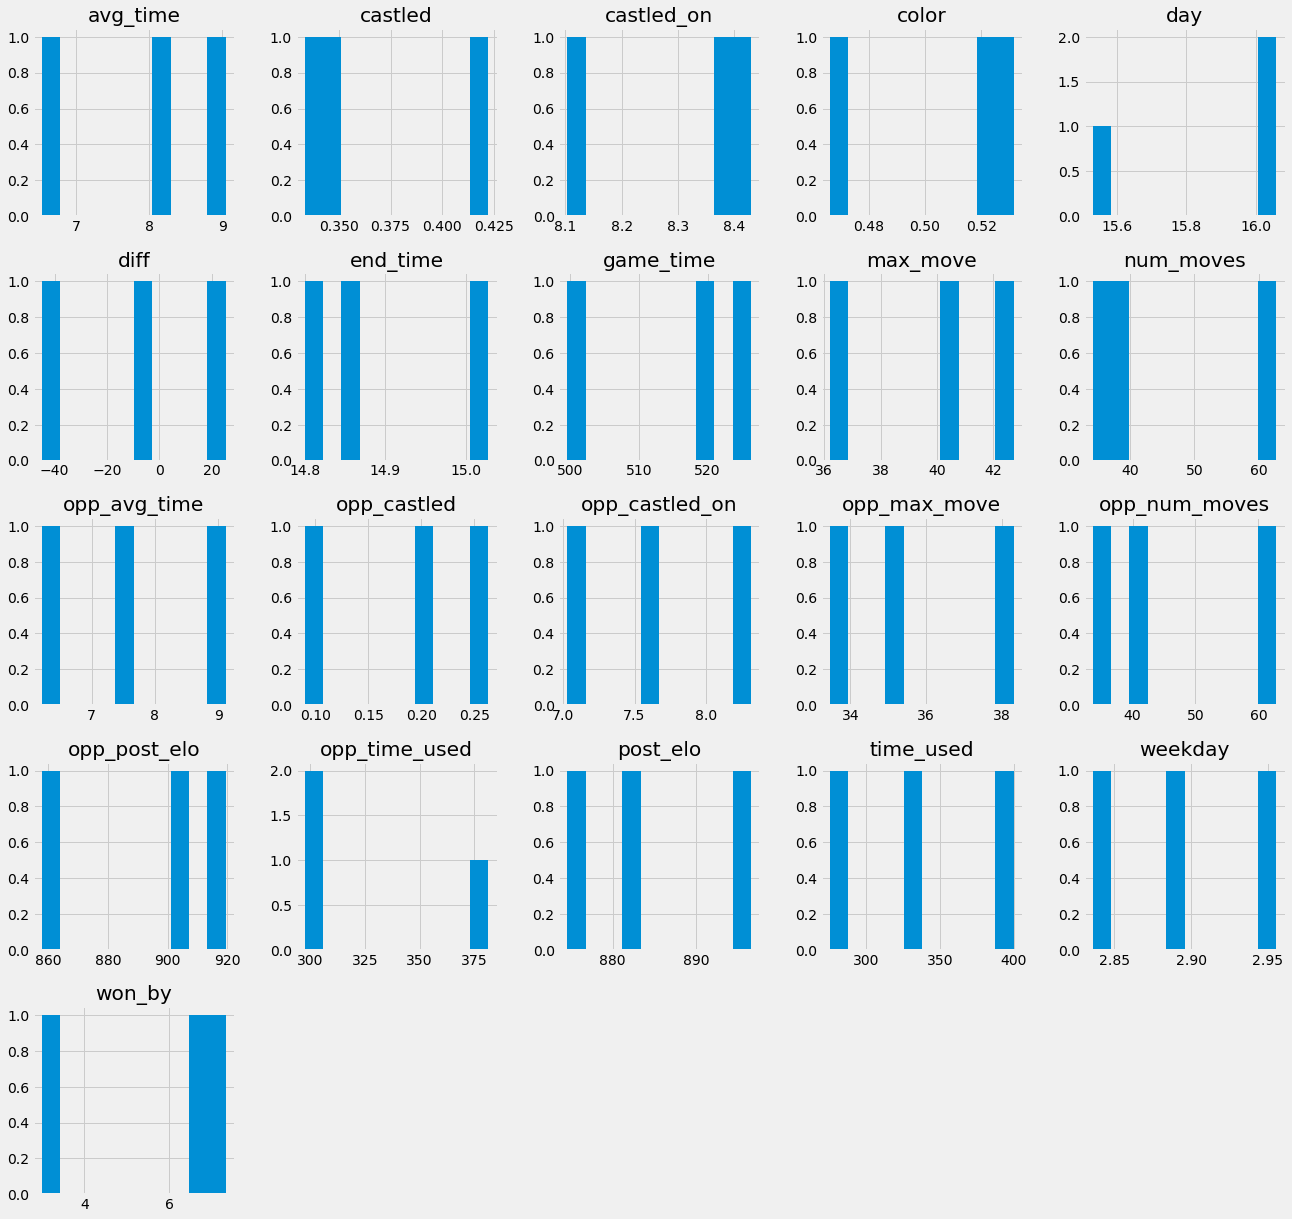

           result  end_time  num_moves  color  won_by  weekday   day  \
game_time                                                              
180          0.42     14.20      36.70   0.54    6.67     2.20 13.32   
300          0.42     14.31      37.08   0.52    6.75     2.68 16.38   
600          0.52     15.17      39.18   0.49    6.81     2.97 15.83   

           castled_on  opp_castled_on  castled  ...    time_used  \
game_time                                       ...                
180              7.75            7.46     0.26  ...       160.96   
300              8.08            8.06     0.39  ...       226.88   
600              8.35            7.59     0.39  ...       347.51   

           opp_time_used  opp_num_moves  avg_time  opp_avg_time  max_move  \
game_time                                                                   
180               164.61          36.77      4.30          4.42     18.05   
300               207.91          37.15      6.96          5.92    

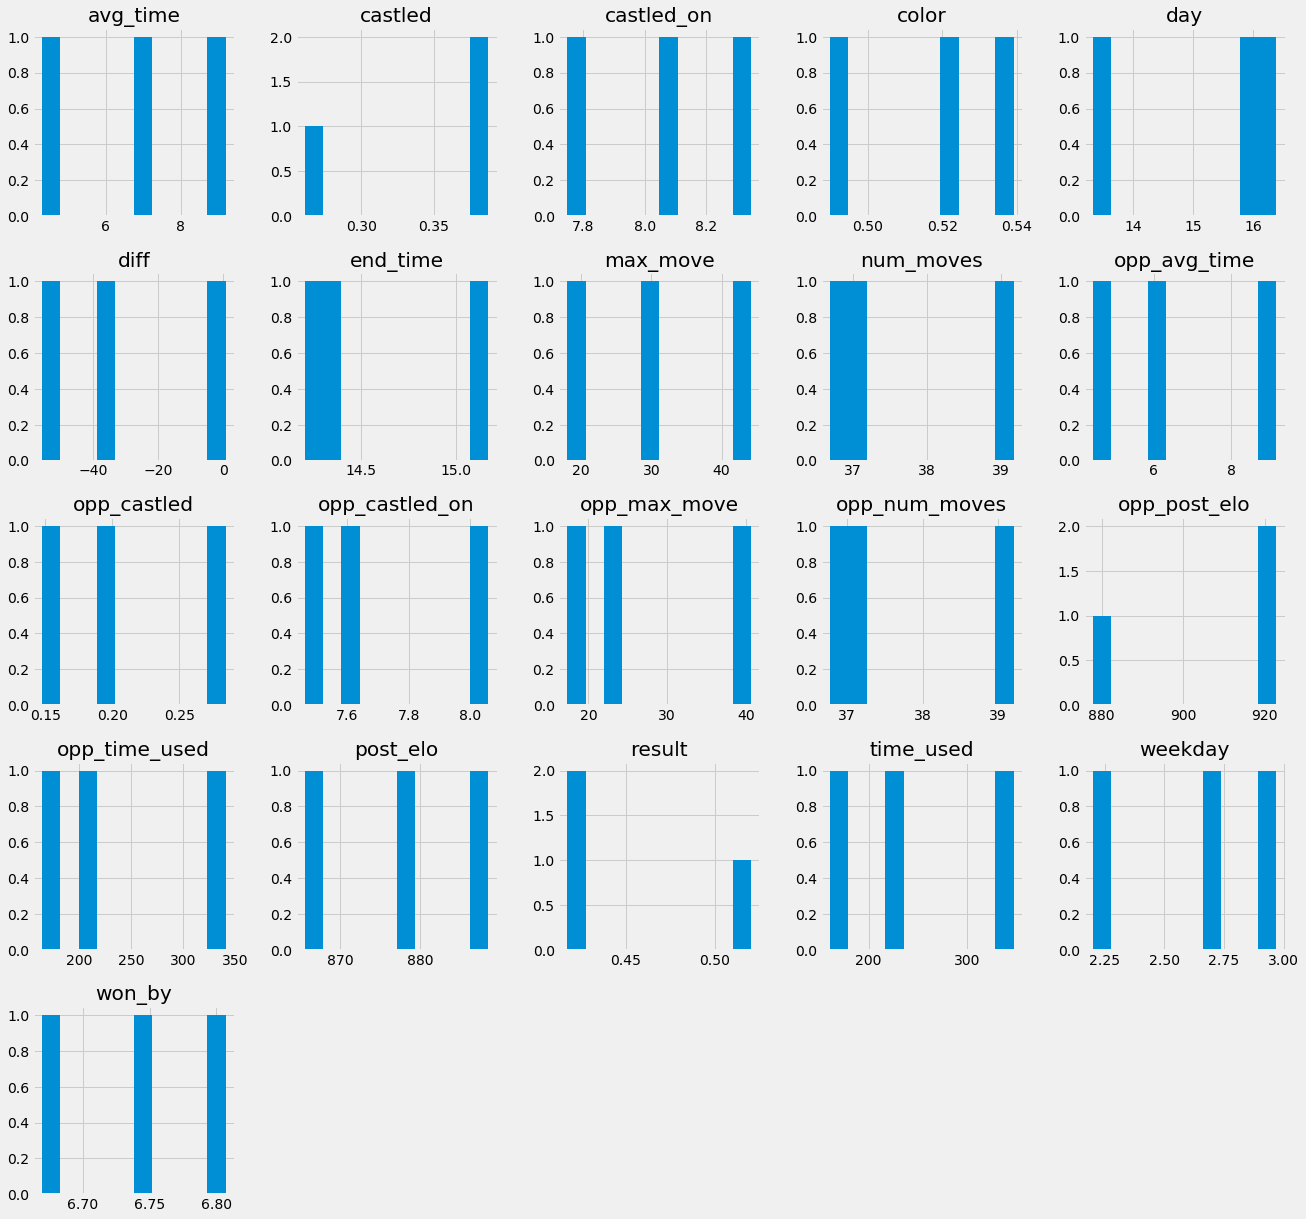

          result  game_time  num_moves  color  won_by  weekday   day  \
end_time                                                               
0.00        0.48     524.52      39.61   0.39    6.81     3.45 14.74   
1.00        0.31     487.50      58.00   0.38    6.88     3.88 20.25   
2.00        0.00     396.00      40.40   0.60    6.60     3.00 14.80   
6.00        0.60     600.00      58.60   0.60    8.00     2.60 14.20   
7.00        0.58     525.00      37.25   0.58    6.33     2.38 16.33   
8.00        0.45     507.48      38.04   0.51    6.81     2.92 16.61   
9.00        0.51     513.33      39.21   0.53    6.77     2.99 16.01   
10.00       0.57     510.60      37.29   0.51    6.82     2.97 16.03   
11.00       0.50     485.71      36.55   0.48    6.63     2.97 15.49   
12.00       0.45     482.75      41.52   0.52    6.55     2.97 16.39   
13.00       0.51     503.79      39.75   0.50    6.85     2.97 15.93   
14.00       0.52     523.76      40.53   0.47    6.91     2.65 1

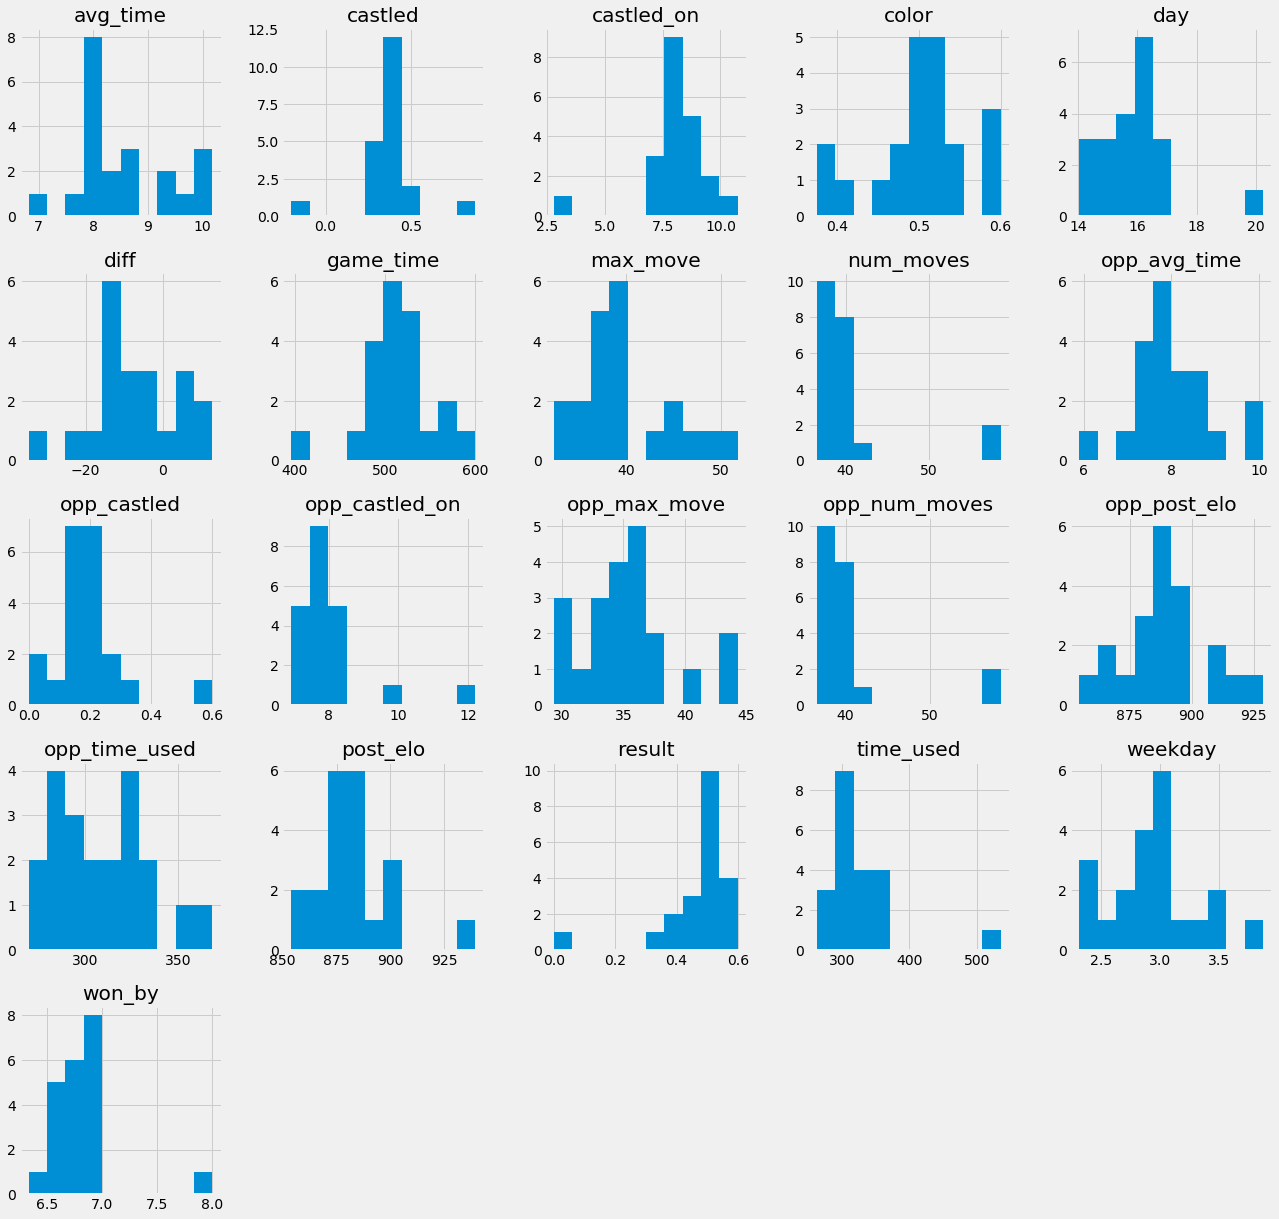

           result  game_time  end_time  color  won_by  weekday   day  \
num_moves                                                              
0            0.00     220.00     17.67   0.00    6.00     1.33 10.67   
1            0.75     345.00     15.00   0.50    5.50     1.75 11.75   
2            1.00     525.00     15.00   0.50    4.50     3.50 19.00   
3            0.78     600.00     12.89   0.22    6.67     3.00 16.11   
4            1.00     600.00     17.00   1.00    7.00     0.00 14.00   
5            0.44     566.67     17.22   0.11    6.89     2.44 14.44   
6            0.82     561.82     17.00   0.09    4.82     1.91 17.73   
7            0.73     490.91     15.18   0.18    6.82     2.55 13.27   
8            1.00     550.00     17.25   0.33    6.17     1.42 15.50   
9            0.38     530.77     15.15   0.46    6.62     2.46 16.69   
10           0.62     401.54     13.38   0.54    6.77     3.15 13.38   
11           0.82     522.35     15.59   0.24    5.94     2.94 1

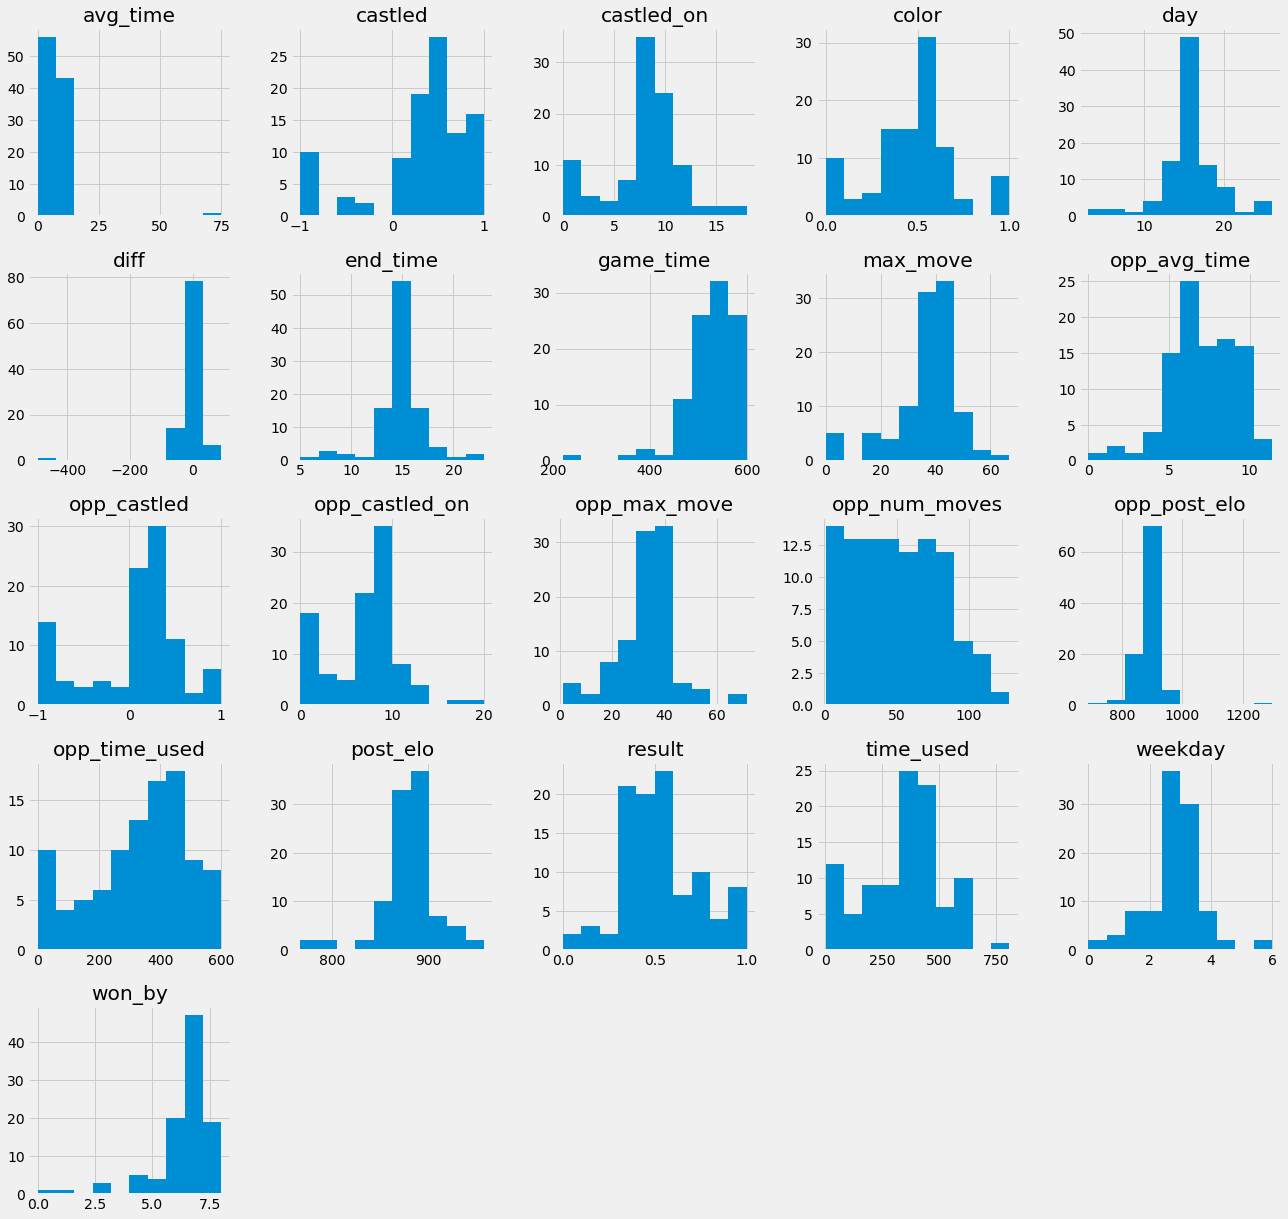

       result  game_time  end_time  num_moves  won_by  weekday   day  \
color                                                                  
0        0.46     518.00     14.93      38.25    6.76     2.80 15.77   
1        0.52     508.30     14.94      38.94    6.82     2.94 15.86   

       castled_on  opp_castled_on  castled  ...    time_used  opp_time_used  \
color                                       ...                               
0            7.91            7.96     0.25  ...       314.57         296.90   
1            8.60            7.41     0.51  ...       308.72         309.31   

       opp_num_moves  avg_time  opp_avg_time  max_move  opp_max_move  \
color                                                                  
0              38.82      8.49          7.98     39.90         35.40   
1              38.45      8.42          8.46     39.21         36.20   

       post_elo  opp_post_elo   diff  
color                                 
0        879.82        888.

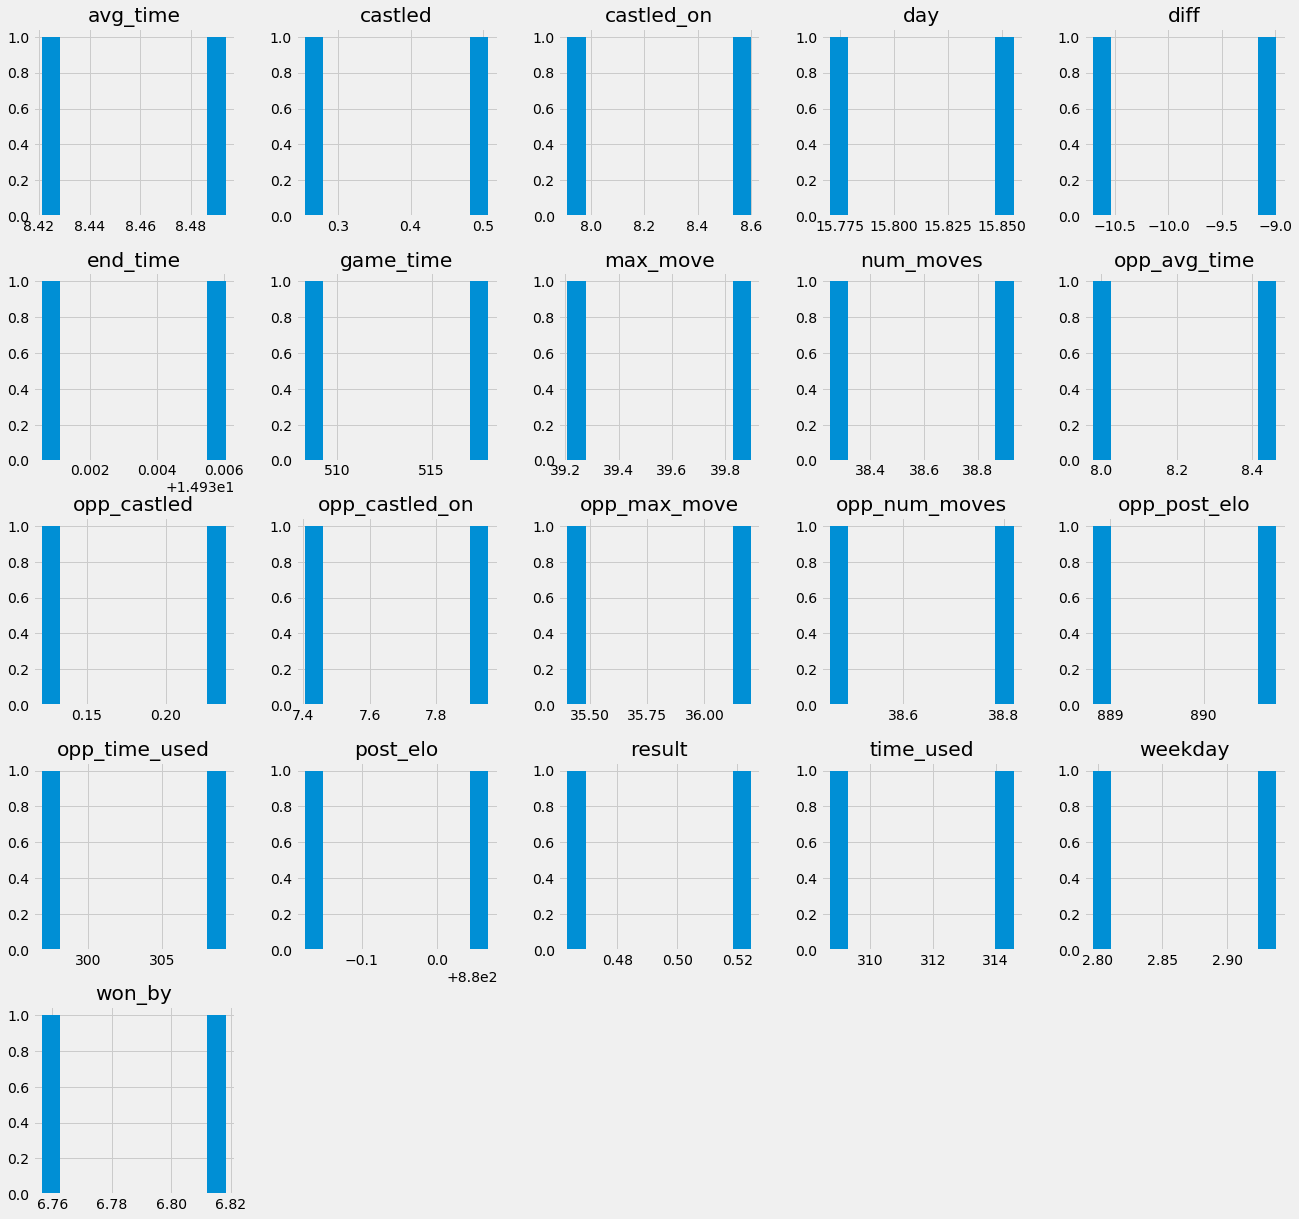

        result  game_time  end_time  num_moves  color  weekday   day  \
won_by                                                                 
0         0.50     600.00      8.00     127.00   0.00     4.00 25.00   
1         0.50     500.36     14.98      63.11   0.48     2.95 15.98   
2         0.76     566.59     14.62      23.35   0.36     2.44 15.62   
3         0.50     552.63     14.84      52.95   0.47     2.89 16.53   
4         0.50     600.00     10.33      57.67   1.00     2.00 18.33   
5         0.50     519.64     14.96      64.96   0.55     3.02 15.70   
6         0.47     438.33     15.00      46.03   0.53     2.80 16.11   
7         0.79     546.47     14.95      30.32   0.52     2.91 15.66   
8         0.29     518.38     14.95      38.64   0.48     2.89 15.76   

        castled_on  opp_castled_on  castled  ...    time_used  opp_time_used  \
won_by                                       ...                               
0            18.00            0.00     0.00  ..

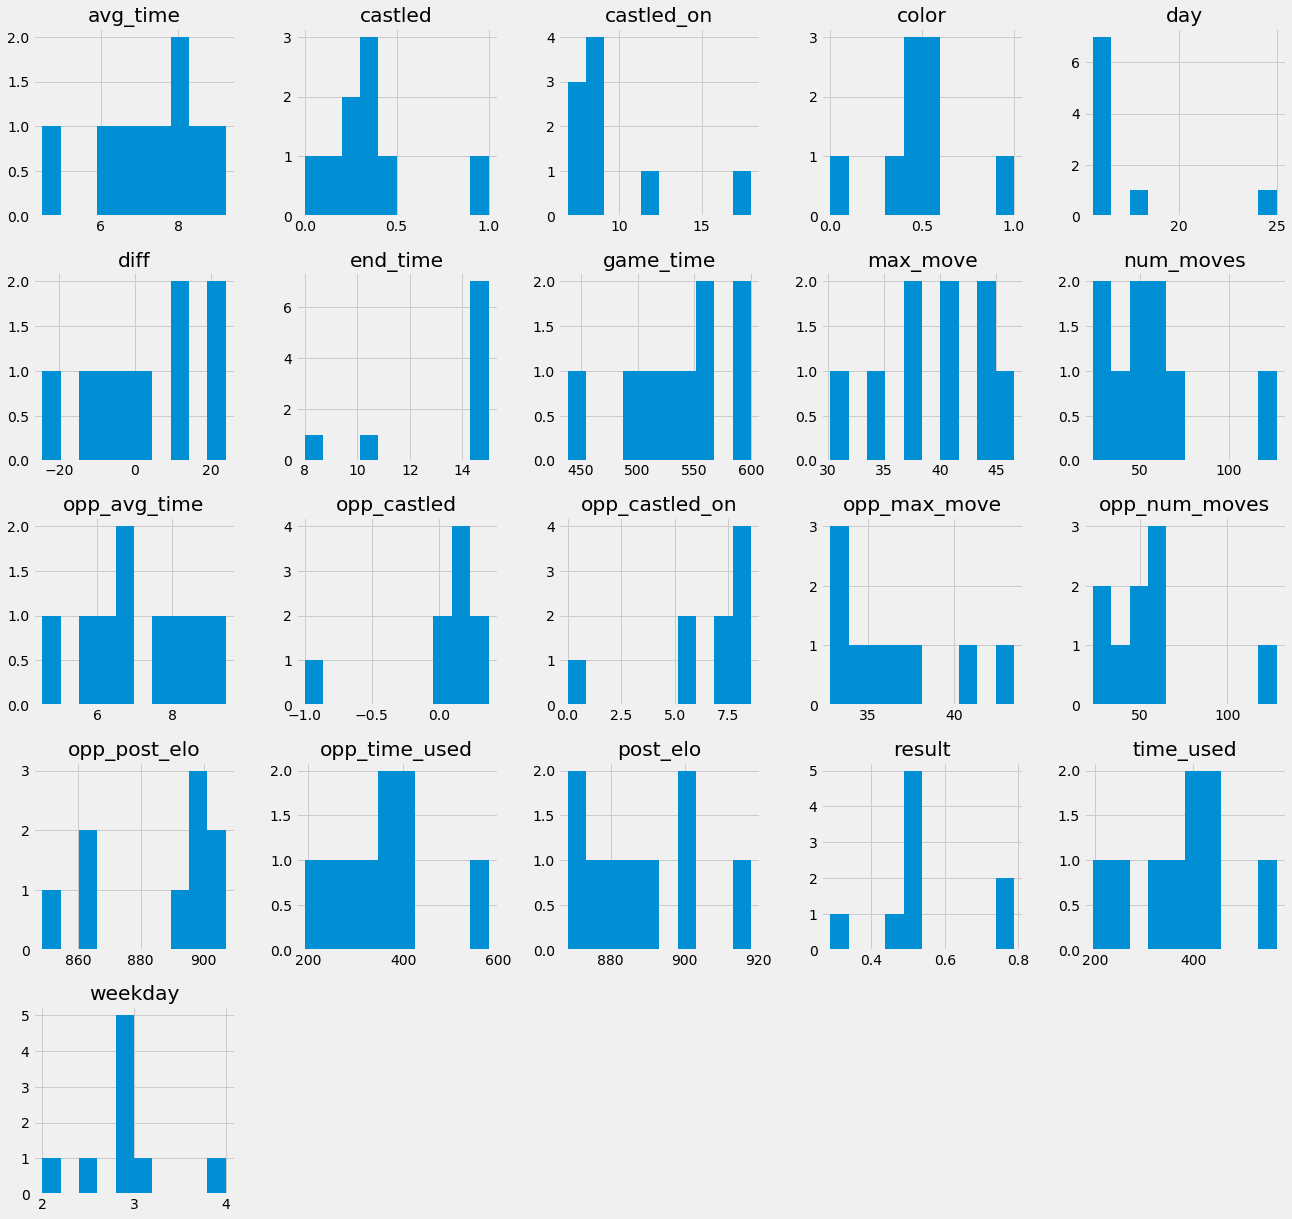

         result  game_time  end_time  num_moves  color  won_by   day  \
weekday                                                                
0          0.50     505.90     15.18      36.54   0.47    6.65 14.95   
1          0.49     499.17     14.61      38.62   0.47    6.87 14.40   
2          0.51     498.94     15.20      38.41   0.51    6.84 15.93   
3          0.52     514.68     14.90      39.85   0.52    6.56 16.44   
4          0.44     507.44     14.72      38.34   0.52    6.81 16.67   
5          0.50     526.52     14.78      38.65   0.50    6.81 16.24   
6          0.49     546.53     15.13      40.01   0.52    6.92 16.51   

         castled_on  opp_castled_on  castled  ...    time_used  opp_time_used  \
weekday                                       ...                               
0              7.92            7.86     0.34  ...       287.08         288.92   
1              8.46            7.88     0.39  ...       299.17         292.83   
2              8.16        

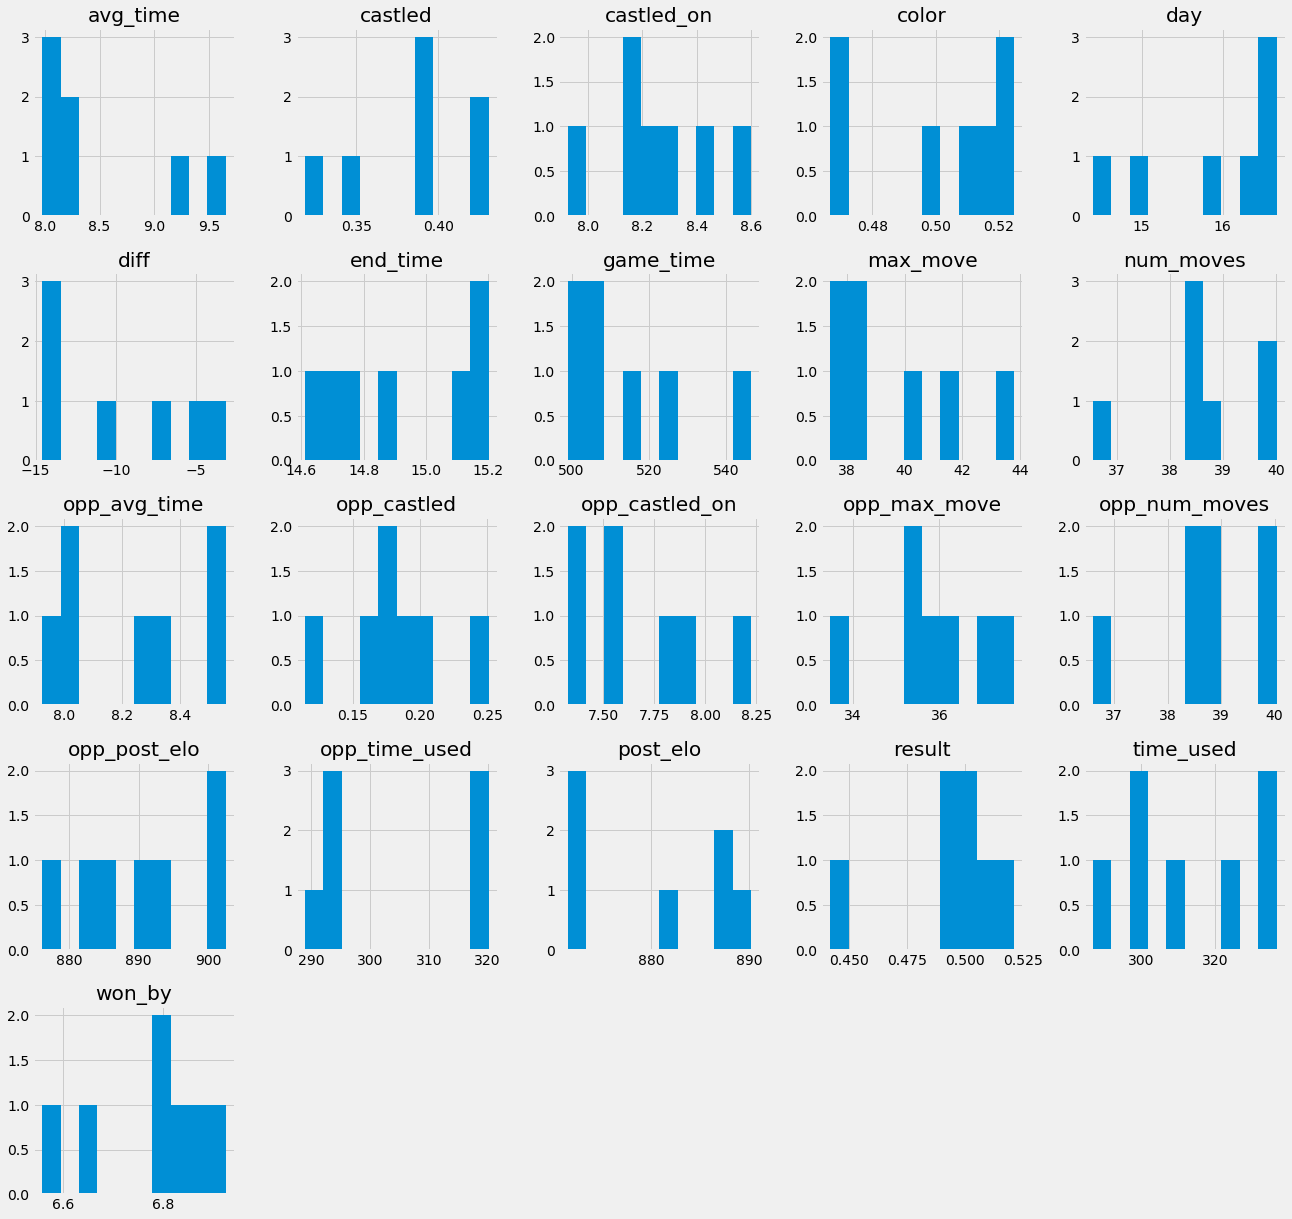

     result  game_time  end_time  num_moves  color  won_by  weekday  \
day                                                                   
1      0.52     497.73     13.59      38.14   0.55    6.73     1.93   
2      0.45     476.52     15.14      38.86   0.49    6.99     2.46   
3      0.55     526.48     15.07      35.24   0.49    6.61     3.11   
4      0.43     548.70     15.83      35.65   0.49    6.75     2.48   
5      0.50     481.62     16.03      36.39   0.47    6.68     2.91   
6      0.50     533.04     16.33      36.90   0.48    6.94     3.67   
7      0.54     518.10     14.10      39.89   0.56    6.87     2.90   
8      0.45     501.49     14.60      37.66   0.48    6.84     2.22   
9      0.59     547.24     14.10      38.47   0.53    6.84     2.43   
10     0.55     493.40     15.16      36.68   0.52    6.50     1.94   
11     0.47     542.11     15.14      39.40   0.44    7.02     3.11   
12     0.52     546.89     15.66      38.59   0.52    7.08     2.51   
13    

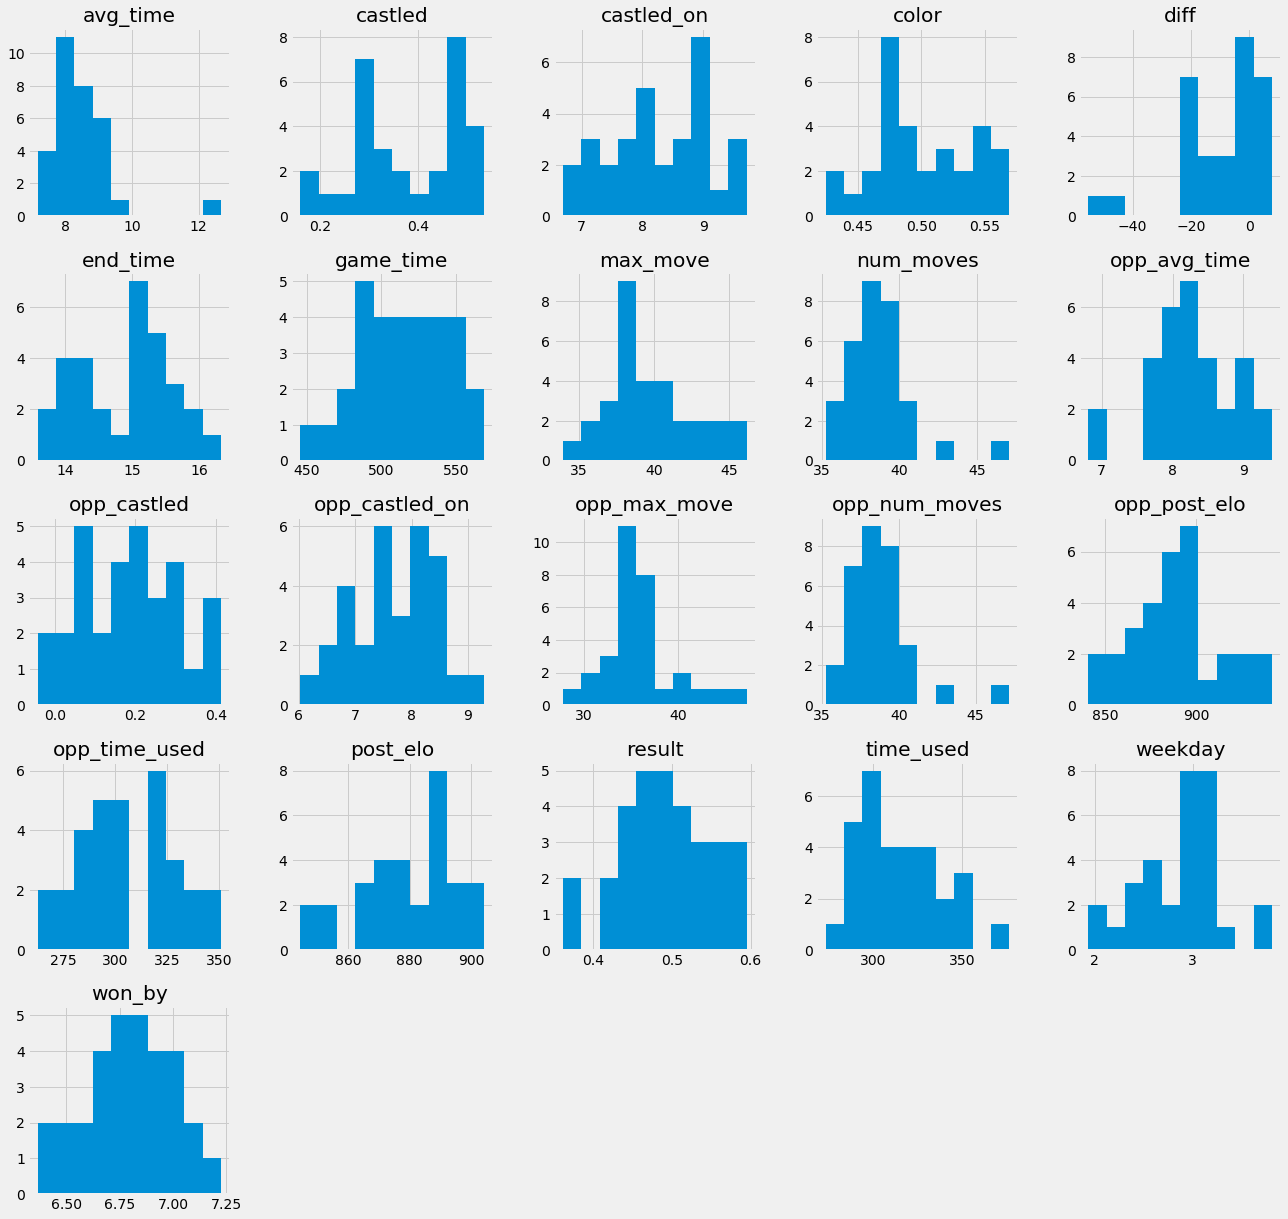

            result  game_time  end_time  num_moves  color  won_by  weekday  \
castled_on                                                                   
0             0.47     514.50     14.93      31.54   0.39    6.71     2.73   
4             0.57     514.29     17.29      38.86   0.57    6.71     2.29   
5             0.45     523.24     15.62      40.71   0.72    6.78     3.50   
6             0.57     510.53     14.59      37.56   0.57    6.76     3.06   
7             0.49     504.25     14.95      40.86   0.59    6.88     3.10   
8             0.49     500.00     15.20      40.18   0.57    6.89     2.93   
9             0.52     500.25     15.30      40.77   0.56    7.00     2.97   
10            0.49     517.41     14.23      40.83   0.52    6.60     2.65   
11            0.54     503.54     14.73      42.12   0.42    6.99     2.92   
12            0.53     503.60     14.57      41.45   0.54    6.97     2.69   
13            0.51     512.88     15.15      39.88   0.55    6.5

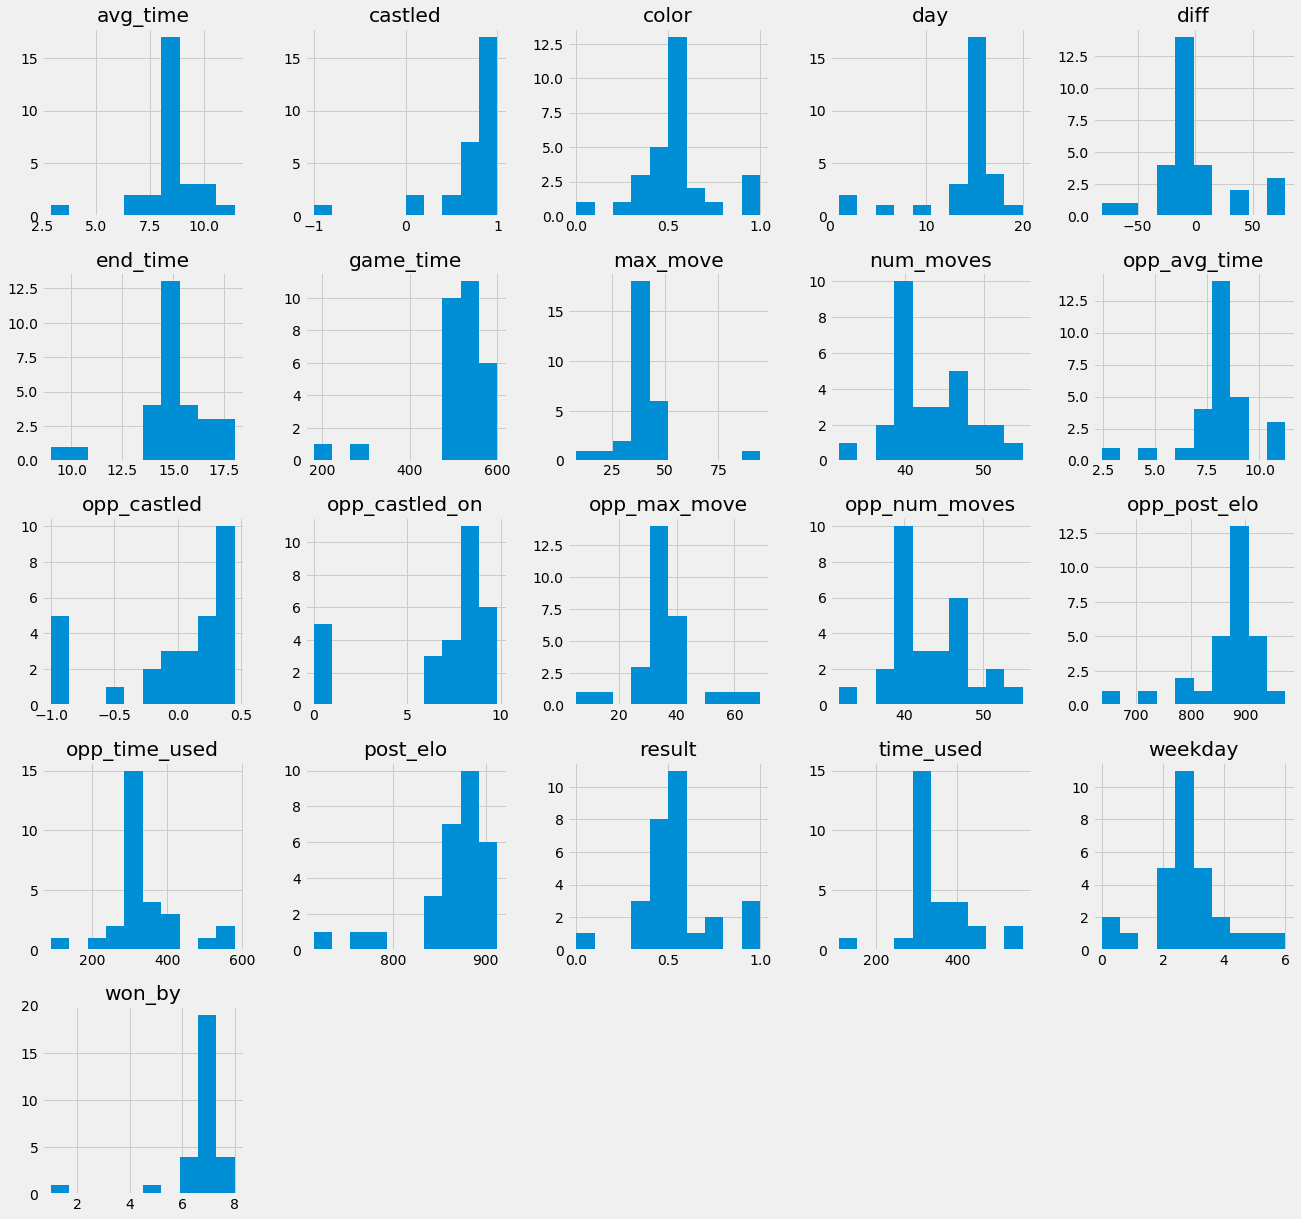

                result  game_time  end_time  num_moves  color  won_by  \
opp_castled_on                                                          
0                 0.57     523.97     14.91      34.75   0.53    6.68   
4                 0.46     466.15     14.65      37.54   0.12    6.81   
5                 0.48     533.23     14.89      43.13   0.47    6.60   
6                 0.48     470.62     14.74      38.65   0.51    6.76   
7                 0.44     509.50     14.81      37.88   0.49    7.04   
8                 0.41     503.15     16.07      39.95   0.55    7.02   
9                 0.48     500.31     16.24      37.68   0.43    6.95   
10                0.43     498.84     14.38      40.35   0.55    6.94   
11                0.44     533.10     14.87      40.86   0.47    6.58   
12                0.46     511.38     14.19      37.97   0.45    6.83   
13                0.50     489.44     14.45      41.10   0.52    6.36   
14                0.54     507.84     15.19      43

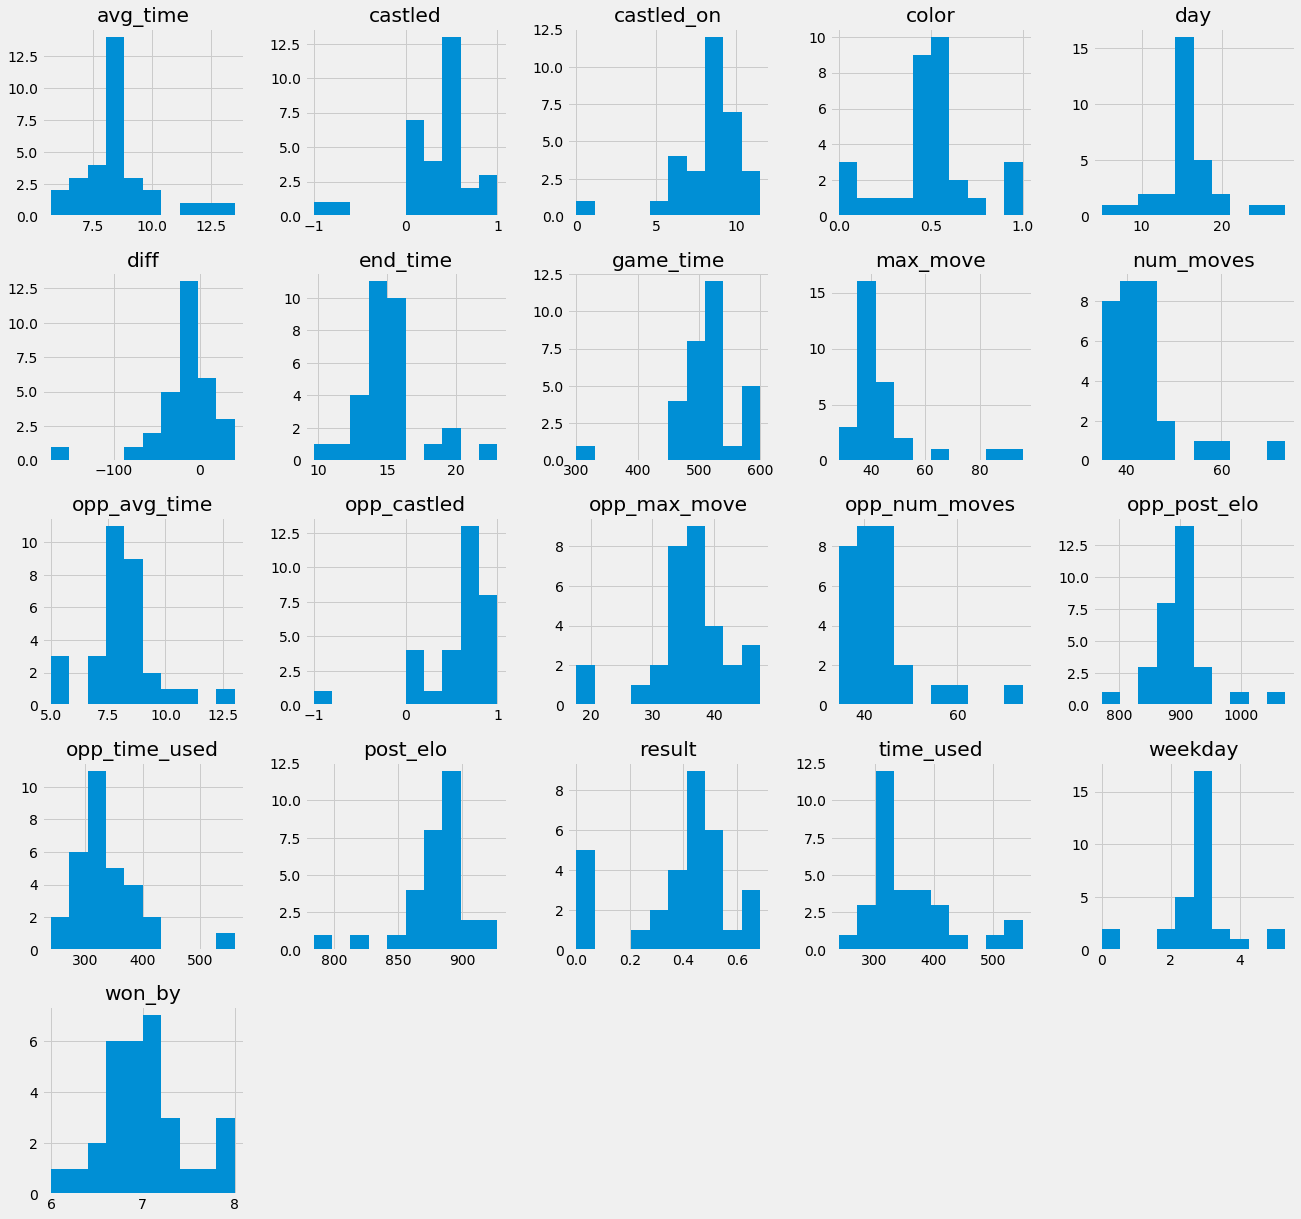

         result  game_time  end_time  num_moves  color  won_by  weekday   day  \
castled                                                                         
-1         0.47     514.50     14.93      31.54   0.39    6.71     2.73 16.07   
 0         0.45     484.68     14.31      41.76   0.42    6.72     2.98 16.90   
 1         0.51     517.40     15.04      40.90   0.56    6.83     2.90 15.53   

         castled_on  opp_castled_on  ...    time_used  opp_time_used  \
castled                              ...                               
-1             0.00            6.06  ...       254.99         248.72   
 0            13.42            9.11  ...       316.88         311.34   
 1            10.71            8.09  ...       333.56         323.59   

         opp_num_moves  avg_time  opp_avg_time  max_move  opp_max_move  \
castled                                                                  
-1               31.73      8.50          7.92     36.33         32.31   
 0         

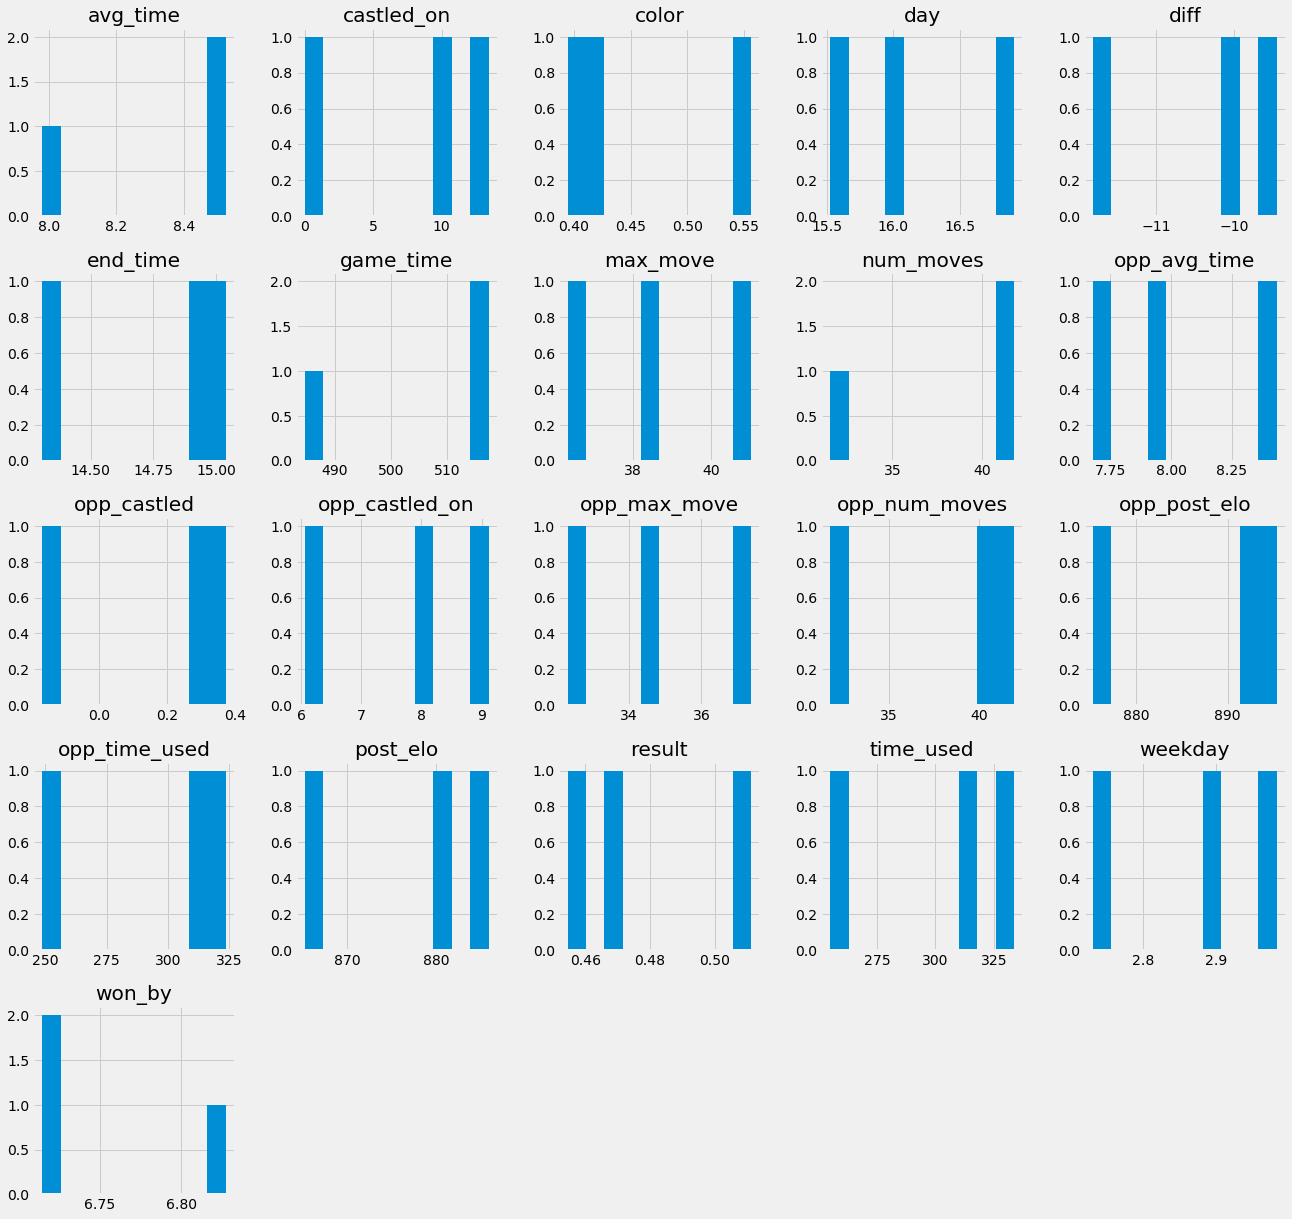

             result  game_time  end_time  num_moves  color  won_by  weekday  \
opp_castled                                                                   
-1             0.57     523.97     14.91      34.75   0.53    6.68     2.85   
 0             0.44     512.41     14.84      40.84   0.55    7.06     2.79   
 1             0.46     506.30     14.97      40.48   0.47    6.78     2.90   

              day  castled_on  opp_castled_on  ...    time_used  \
opp_castled                                    ...                
-1          15.55        7.04            0.00  ...       284.82   
 0          14.95        8.67           14.04  ...       329.07   
 1          16.22        8.93           10.93  ...       324.32   

             opp_time_used  opp_num_moves  avg_time  opp_avg_time  max_move  \
opp_castled                                                                   
-1                  276.58          34.69      8.65          8.14     37.73   
 0                  318.46     

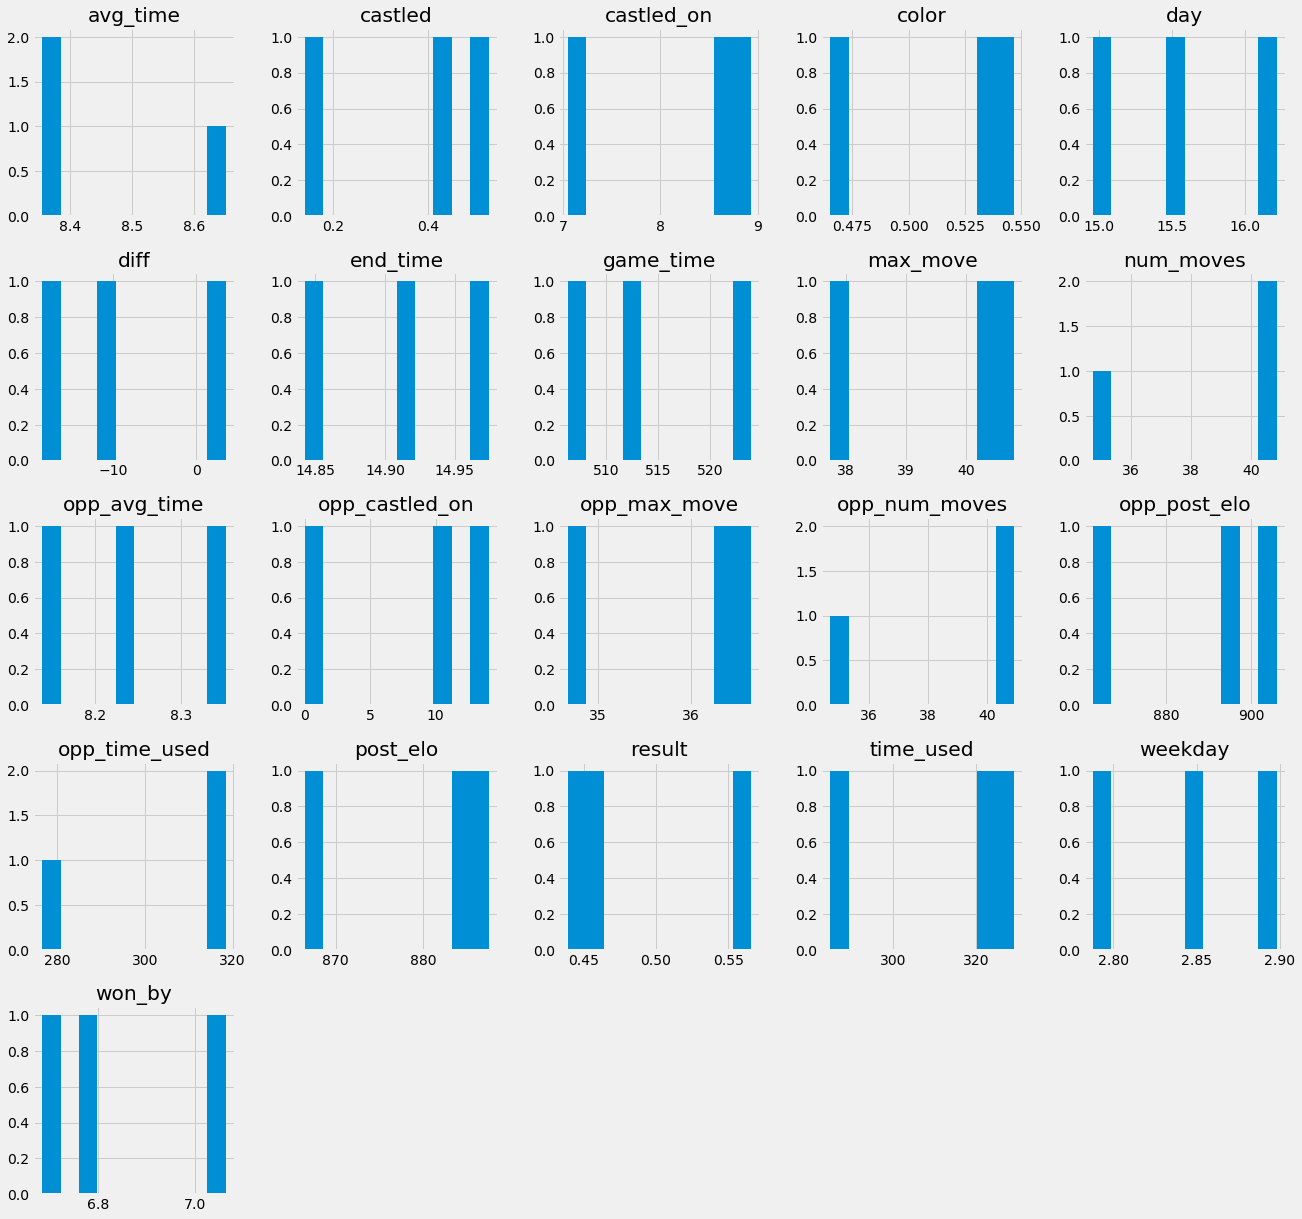

           result  game_time  end_time  num_moves  color  won_by  weekday  \
time_used                                                                   
0            0.80     498.00     15.10       2.10   0.40    6.20     2.30   
10           0.70     510.00     17.10       4.80   0.10    6.30     2.50   
20           0.80     408.00     12.47       7.93   0.33    6.53     2.00   
30           0.83     525.00     16.42       8.17   0.42    6.25     2.67   
40           0.65     448.70     14.65      10.00   0.35    6.65     2.35   
50           0.70     453.00     13.80      11.95   0.65    5.90     2.30   
60           0.74     454.74     15.11      12.79   0.42    7.05     2.89   
70           0.70     456.00     14.10      13.85   0.65    6.20     2.30   
80           0.79     476.84     15.37      14.79   0.63    6.63     2.42   
90           0.65     500.87     14.22      17.43   0.48    6.78     2.57   
100          0.58     490.00     15.42      19.79   0.50    6.83     2.54   

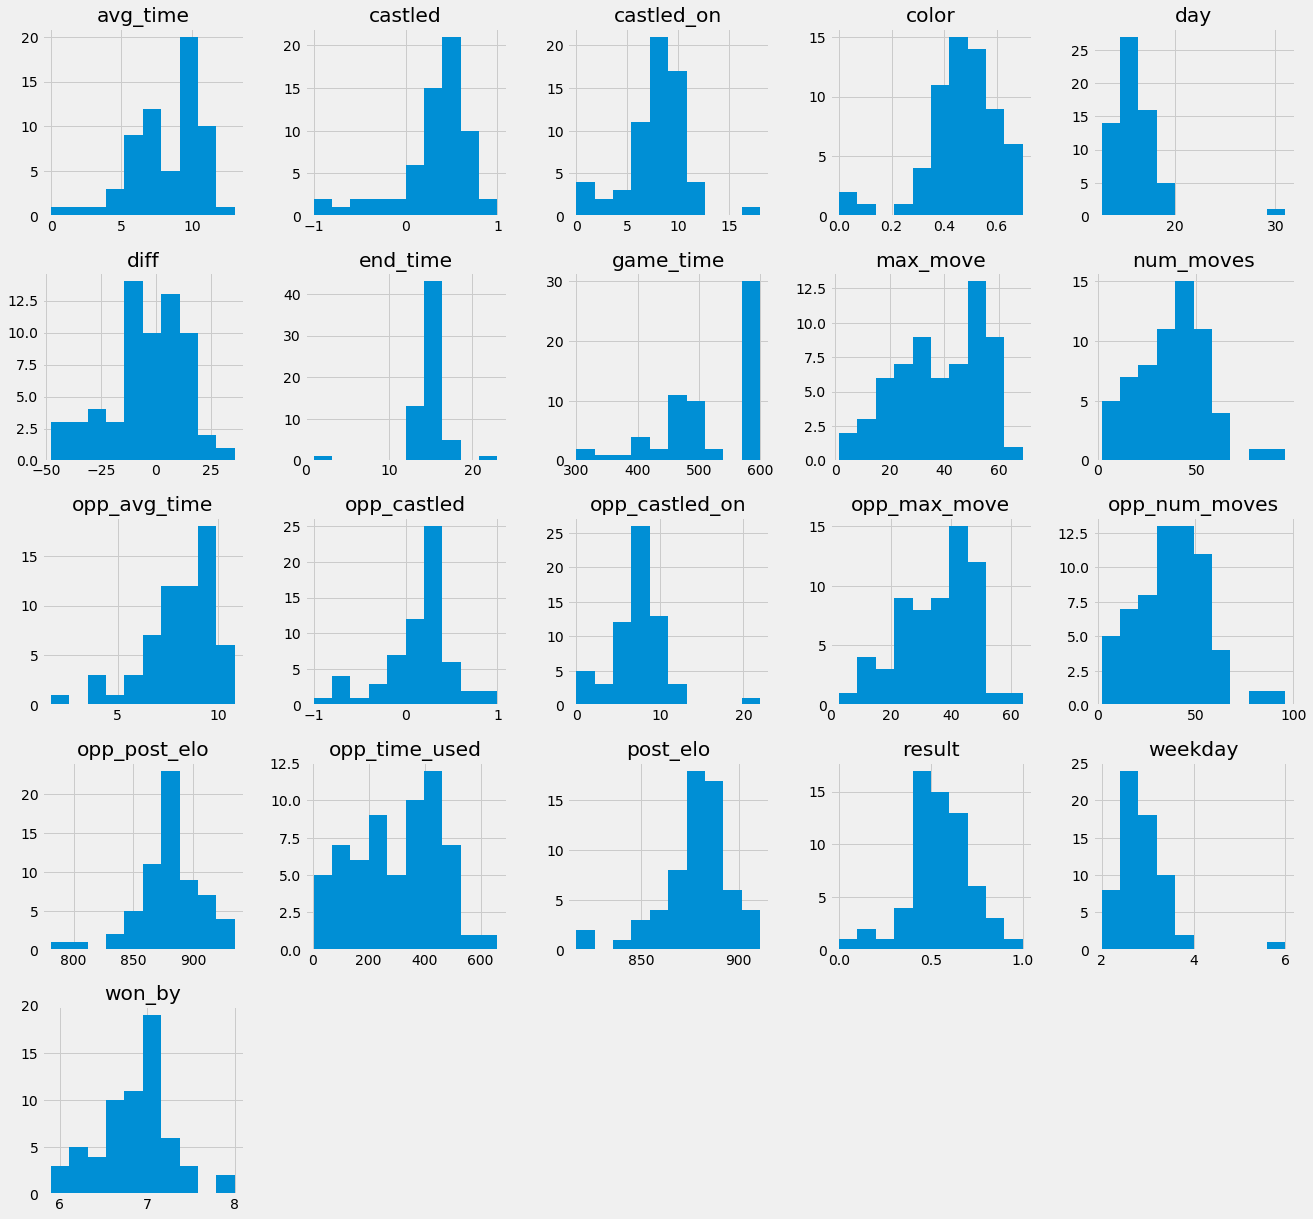

               result  game_time  end_time  num_moves  color  won_by  weekday  \
opp_time_used                                                                   
0                0.64     403.64     15.27       1.36   0.36    5.27     2.27   
10               0.77     553.85     14.62       3.54   0.23    6.85     3.46   
20               0.57     475.71     16.50       6.71   0.21    6.93     1.57   
30               0.65     417.00     13.95       9.60   0.45    6.35     1.80   
40               0.81     468.57     16.52      11.14   0.38    6.29     2.48   
50               0.65     490.59     15.94      12.53   0.53    6.71     2.06   
60               0.59     428.18     12.73      13.59   0.55    7.14     3.50   
70               0.76     494.29     12.81      14.29   0.33    6.43     2.71   
80               0.59     493.64     14.91      15.50   0.59    7.14     2.32   
90               0.68     437.14     14.96      18.07   0.57    6.57     2.96   
100              0.61     44

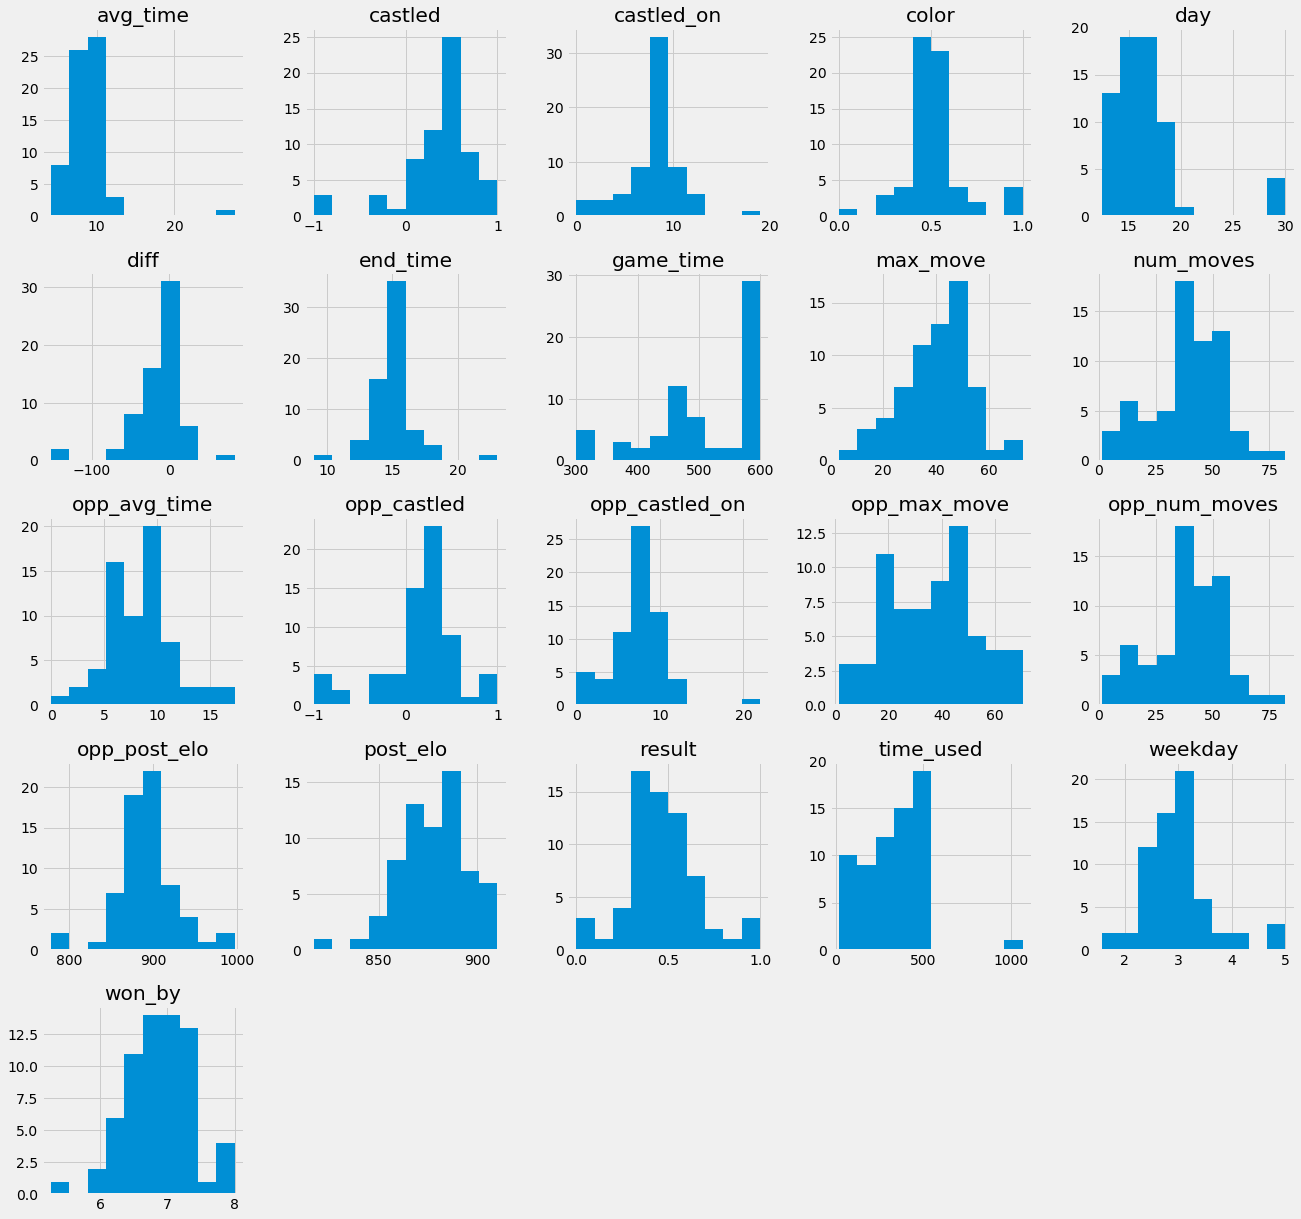

               result  game_time  end_time  num_moves  color  won_by  weekday  \
opp_num_moves                                                                   
0                1.00     300.00     16.00       1.00   1.00    2.00     0.00   
1                0.33     290.00     14.17       0.67   0.33    6.33     2.50   
2                1.00     550.00     14.83       2.17   0.50    4.50     2.17   
3                1.00     600.00     11.00       3.20   0.20    7.00     2.60   
4                0.50     600.00     19.75       3.50   0.25    7.50     3.25   
5                1.00     600.00     17.33       5.33   0.33    7.00     2.67   
6                0.69     581.25     16.94       5.75   0.12    5.69     2.00   
7                0.82     480.00     15.00       7.18   0.36    6.18     1.73   
8                0.71     514.29     16.07       7.93   0.21    6.57     1.86   
9                0.73     507.27     15.09       9.36   0.73    7.18     2.91   
10               0.55     49

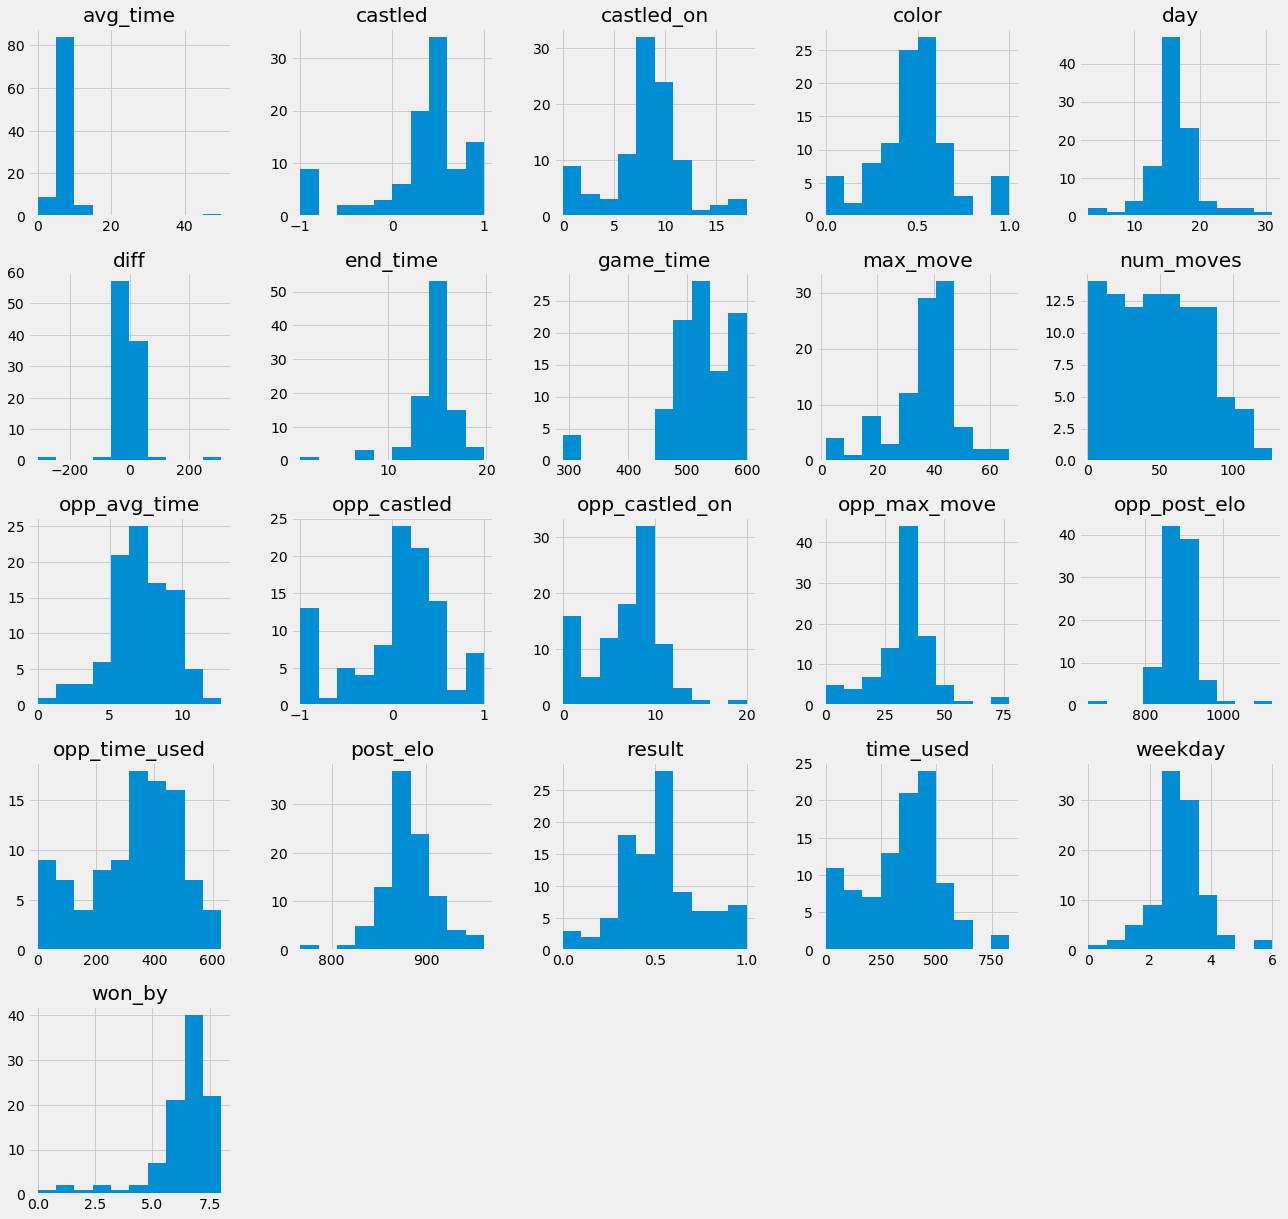

          result  game_time  end_time  num_moves  color  won_by  weekday  \
avg_time                                                                   
0.00        0.62     433.85     15.69       1.62   0.31    6.15     2.08   
1.43        0.00     300.00     15.50       7.00   0.00    8.00     2.50   
1.54        1.00     180.00     13.00      13.00   0.00    7.00     4.00   
1.67        1.00     600.00     14.00       6.00   0.00    4.50     2.00   
1.69        0.00     180.00     11.00      59.00   1.00    8.00     0.00   
1.76        1.00     300.00     11.00      17.00   0.00    7.00     3.00   
1.90        0.00     180.00     12.00      21.00   0.00    8.00     2.00   
1.94        0.00     600.00     10.00      62.00   0.00    8.00     5.00   
2.00        0.43     334.29     17.00       8.57   0.14    6.71     2.14   
2.22        1.00     300.00     10.50       9.00   0.50    7.50     1.00   
2.24        0.00     180.00      9.00      49.00   0.00    8.00     1.00   
2.34        

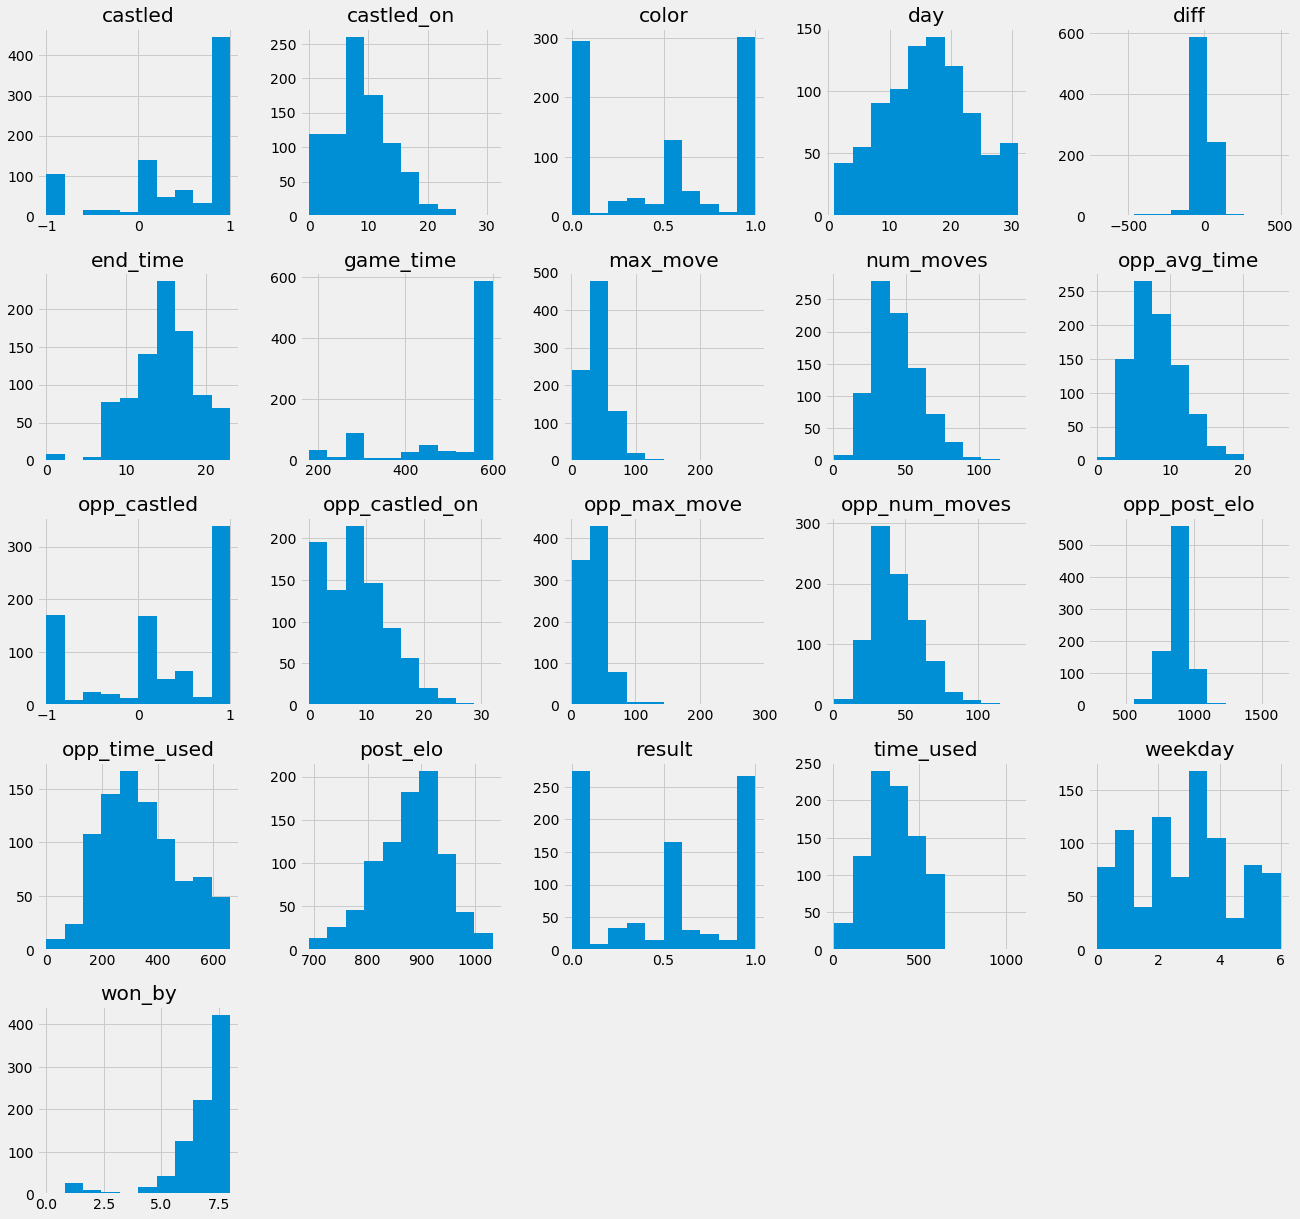

              result  game_time  end_time  num_moves  color  won_by  weekday  \
opp_avg_time                                                                   
0.00            0.60     414.00     15.20       1.40   0.30    5.60     2.50   
1.43            1.00     600.00      8.00       7.00   0.00    7.00     6.00   
1.67            0.00     300.00     22.00       5.00   0.00    8.00     5.00   
1.82            0.00     180.00     16.00      10.00   0.00    7.00     3.00   
1.88            0.50     180.00     16.00      16.50   1.00    7.50     1.00   
2.00            0.50     450.00     14.50      10.00   0.50    7.50     4.50   
2.27            0.00     180.00     14.00      21.00   0.00    8.00     3.00   
2.33            0.00     300.00     17.00      86.00   1.00    6.00     1.00   
2.33            0.00     180.00     10.00      60.00   1.00    6.00     5.00   
2.35            1.00     600.00     21.00      18.00   1.00    7.00     4.00   
2.37            1.00     600.00     12.0

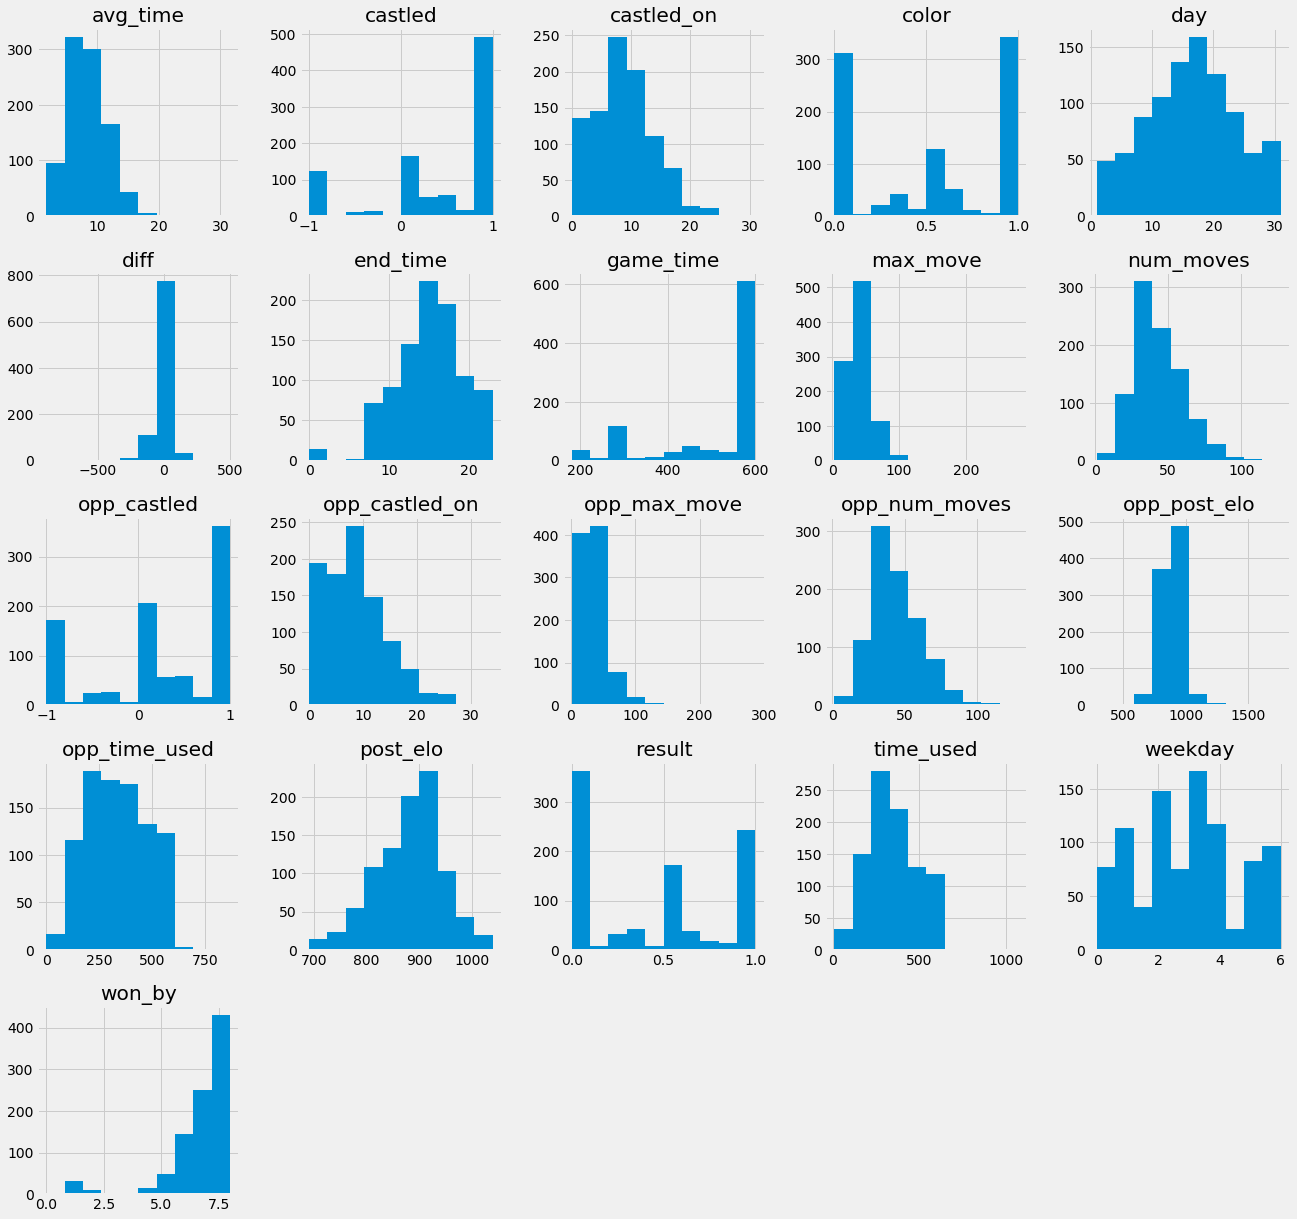

          result  game_time  end_time  num_moves  color  won_by  weekday  \
max_move                                                                   
0.00        0.00     220.00     17.67       0.00   0.00    6.00     1.33   
0.10        1.00     180.00     13.00       1.00   0.00    7.00     1.00   
0.60        1.00     600.00     14.00       2.00   0.50    7.00     0.00   
1.00        0.50     600.00     13.00       2.50   0.50    7.50     4.00   
1.40        1.00     600.00     17.00       3.00   0.00    7.00     3.00   
1.60        0.50     450.00     18.00       2.00   0.50    5.00     1.50   
1.80        1.00     600.00     21.00       2.00   0.00    2.00     5.00   
2.00        0.00     300.00     15.00       7.00   0.00    8.00     2.00   
2.90        1.00     600.00     19.00       5.00   0.00    7.00     1.00   
3.50        0.00     300.00     22.00       5.00   0.00    8.00     5.00   
3.80        1.00     600.00     19.00       6.00   0.00    2.00     3.00   
4.00        

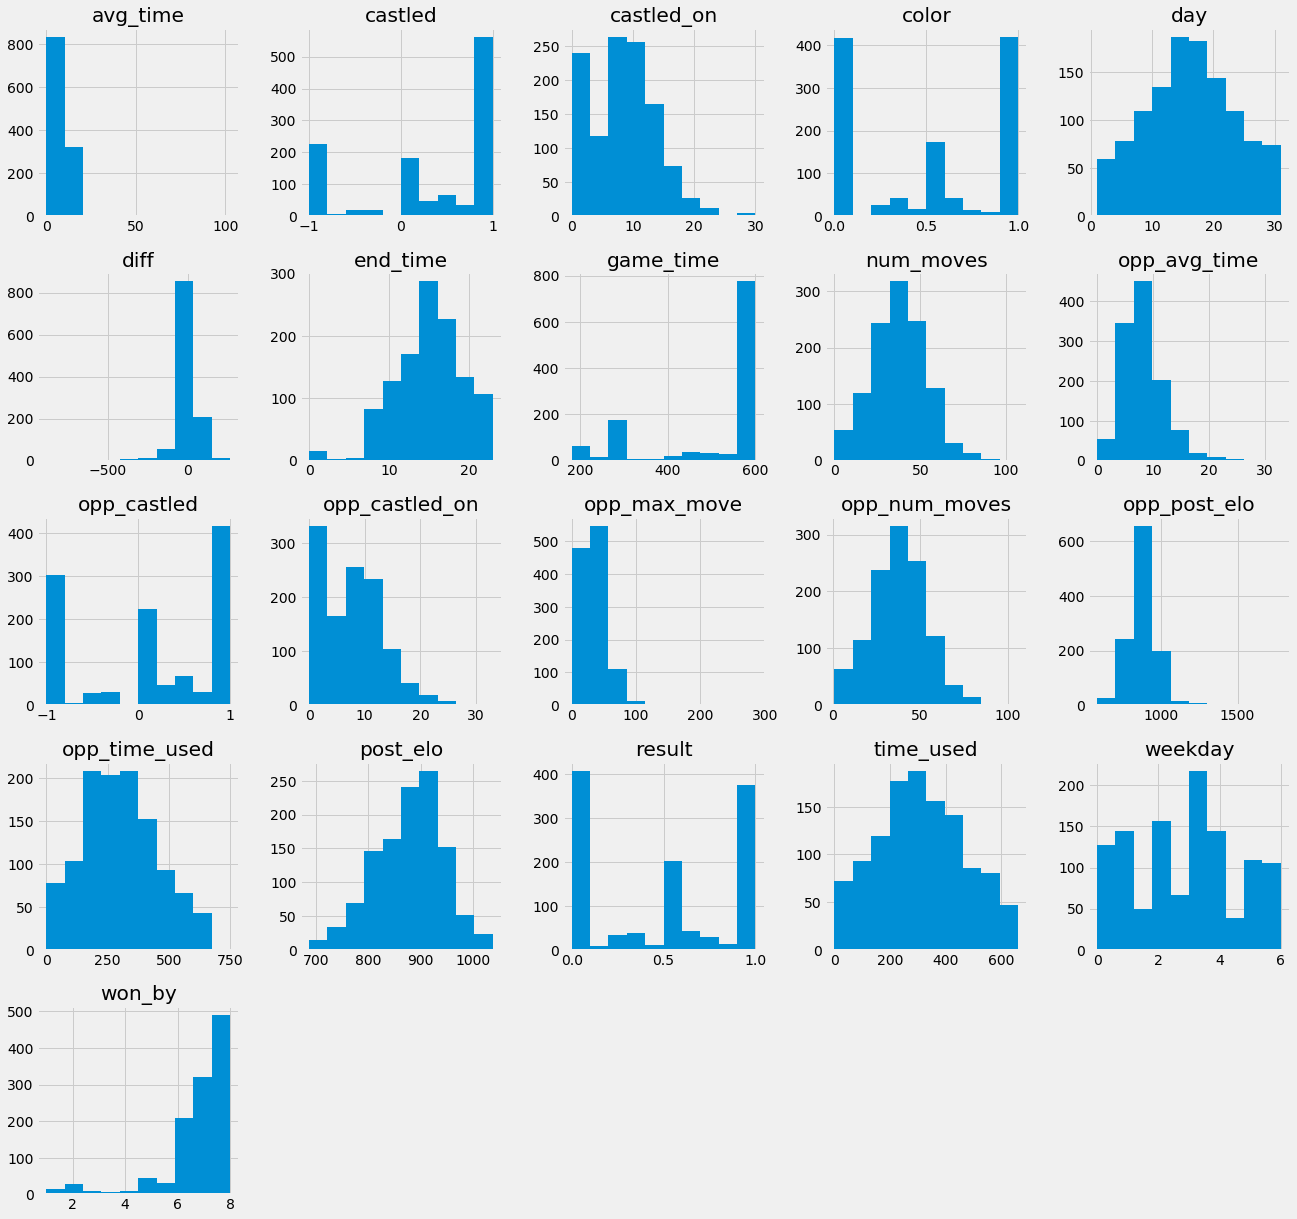

              result  game_time  end_time  num_moves  color  won_by  weekday  \
opp_max_move                                                                   
0.00            1.00     300.00     16.00       1.00   1.00    2.00     0.00   
0.10            1.00     180.00     13.00       1.00   0.00    7.00     1.00   
0.10            0.50     450.00     13.00       1.00   0.50    6.50     2.50   
1.00            1.00     600.00     21.00       2.00   0.00    2.00     5.00   
1.40            0.00     180.00     13.00       0.00   0.00    6.00     0.00   
1.70            0.00     300.00     11.00       1.00   1.00    6.00     6.00   
2.10            0.00     180.00     22.00       0.00   0.00    6.00     3.00   
2.20            1.00     600.00     17.00       3.00   0.00    7.00     3.00   
2.40            1.00     600.00     11.00       3.00   0.00    7.00     0.00   
2.50            0.00     300.00     22.00       5.00   0.00    8.00     5.00   
2.60            1.00     600.00     21.0

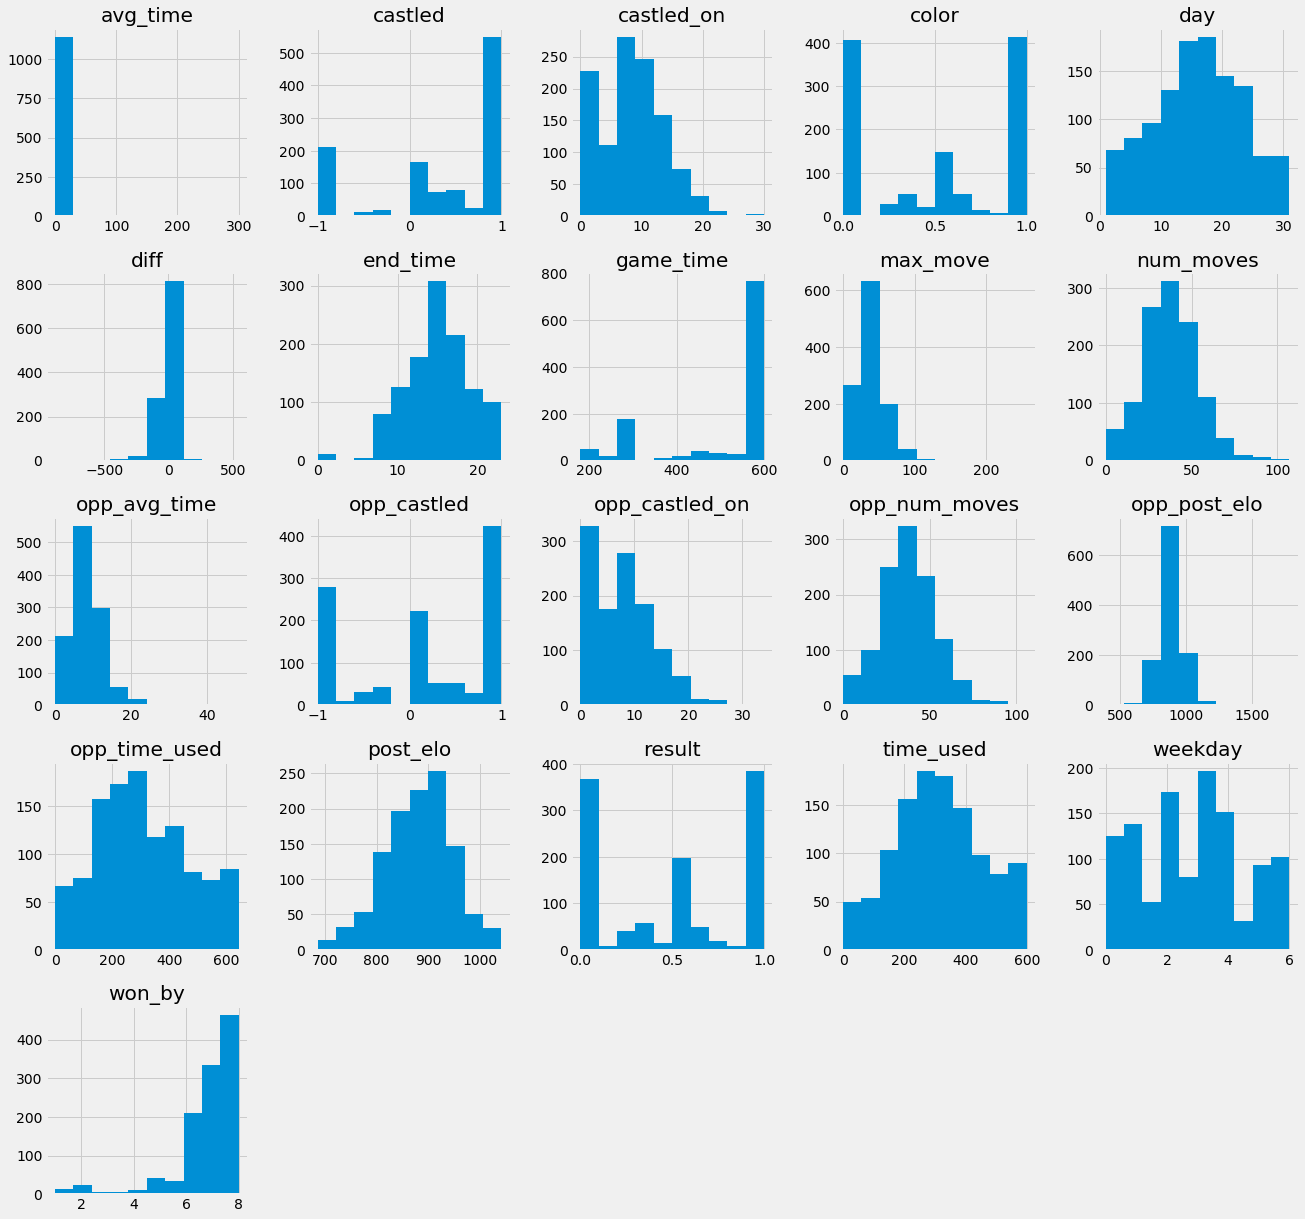

          result  game_time  end_time  num_moves  color  won_by  weekday  \
post_elo                                                                   
679         0.00     600.00     19.00      39.00   0.00    7.00     0.00   
680         0.00     600.00     18.00      26.00   1.00    7.00     0.00   
686         1.00     600.00     14.00      26.50   1.00    7.00     0.50   
687         0.00     600.00     10.00       5.00   0.00    8.00     1.00   
690         0.00     600.00     15.00      50.00   0.00    8.00     0.00   
691         0.25     600.00      4.50      47.00   0.50    5.50     0.00   
692         0.50     600.00     16.00      29.50   0.50    8.00     3.50   
695         0.00     600.00     10.00      24.00   1.00    8.00     1.00   
696         1.00     600.00     11.00      37.00   0.00    6.50     0.50   
698         0.00     600.00     14.00      45.00   0.50    7.00     0.50   
700         1.00     600.00      0.00      32.00   1.00    7.00     0.00   
702         

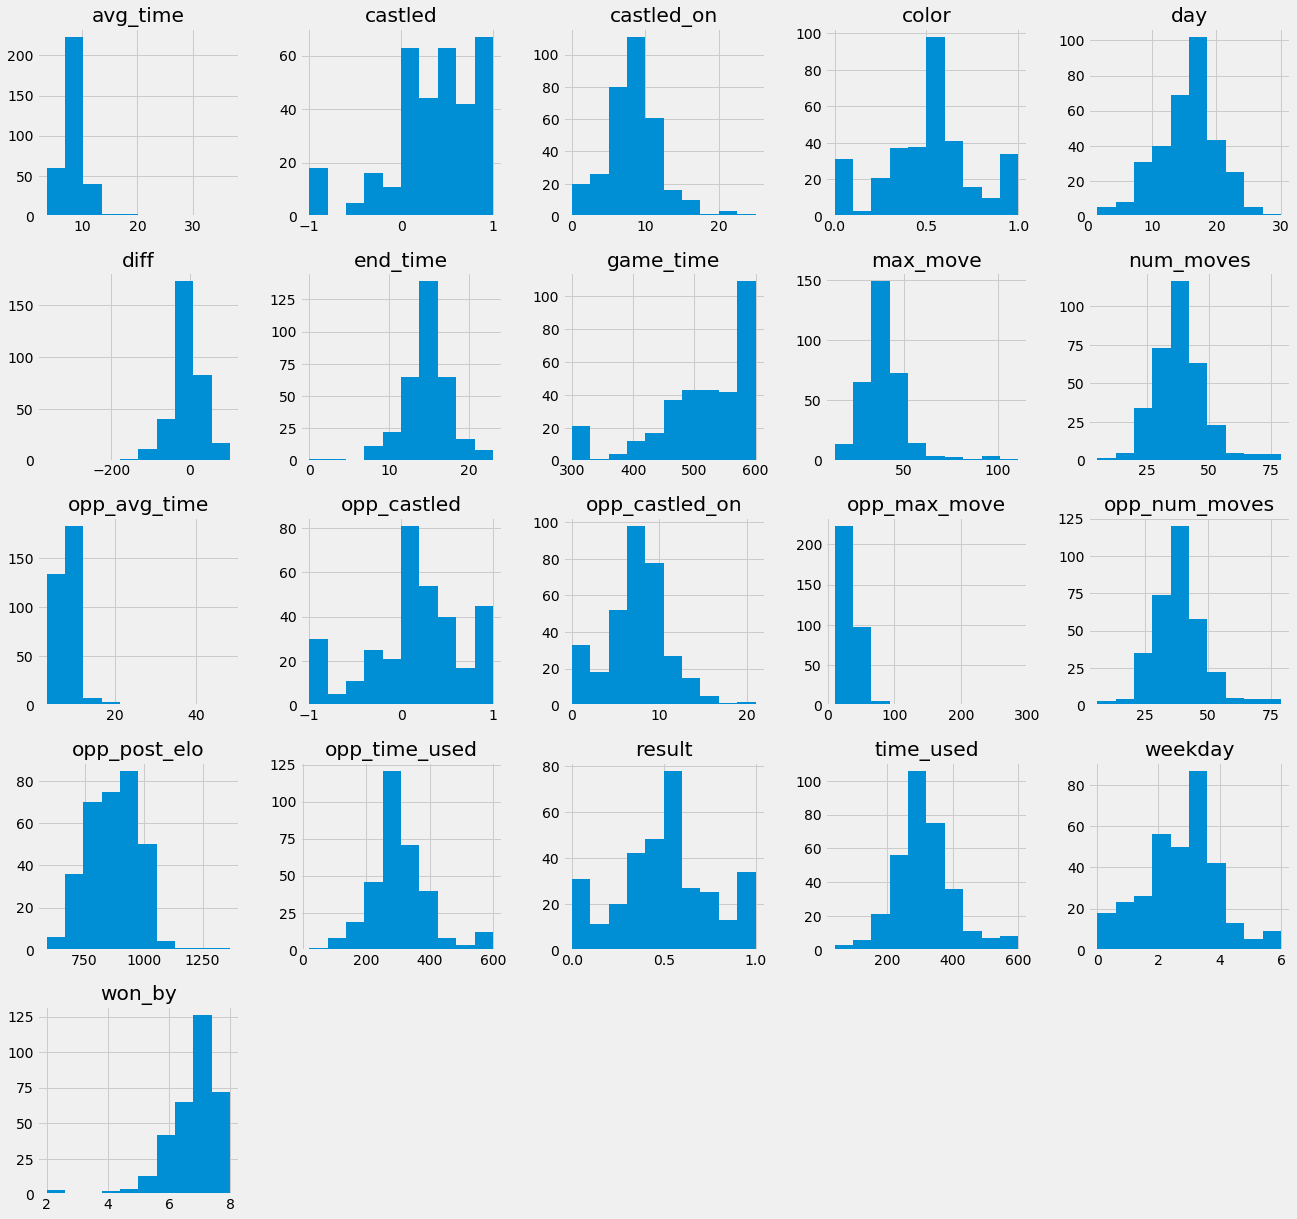

              result  game_time  end_time  num_moves  color  won_by  weekday  \
opp_post_elo                                                                   
291             0.00     180.00     13.00      64.00   0.00    6.00     0.00   
392             1.00     300.00     15.00      20.00   1.00    8.00     0.00   
531             0.00     300.00     16.00      48.00   0.00    6.00     4.00   
572             1.00     600.00      9.00       9.00   0.00    6.00     0.00   
573             1.00     300.00     16.00      46.00   0.00    7.00     3.00   
579             1.00     600.00     20.00      20.00   0.00    6.00     4.00   
588             1.00     600.00      9.00      22.00   0.00    8.00     1.00   
590             0.00     600.00     23.00      37.00   1.00    8.00     6.00   
593             1.00     300.00     16.00      42.00   0.00    6.00     5.00   
594             1.00     600.00     19.00      29.00   1.00    6.00     0.00   
599             0.00     600.00     18.0

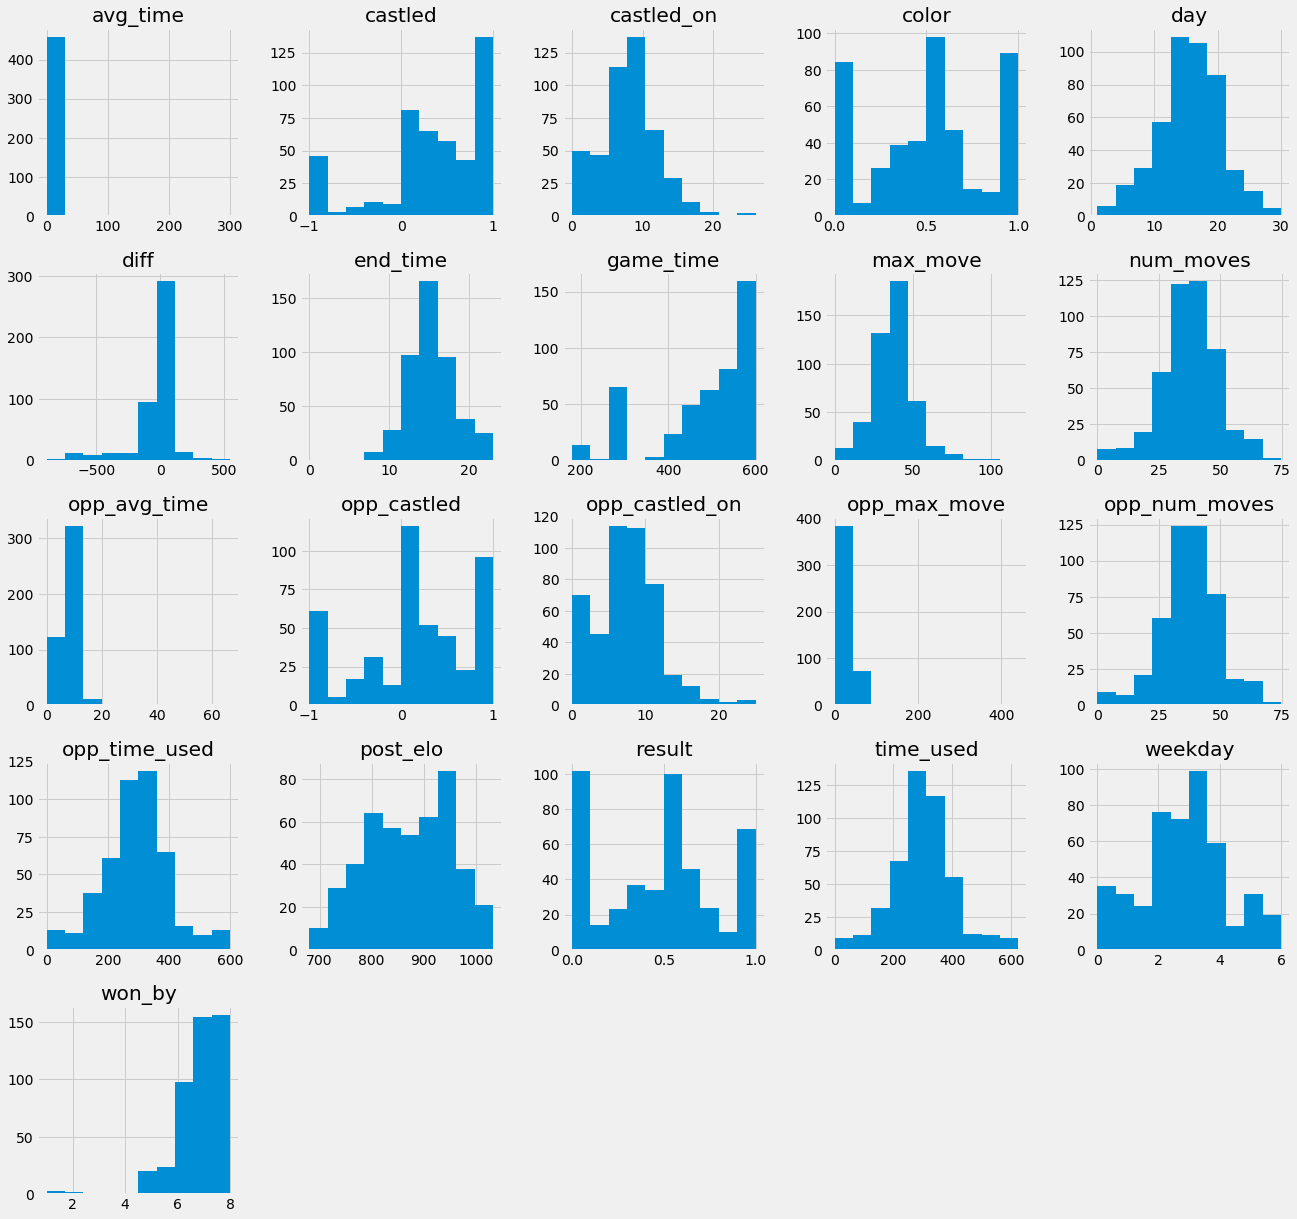

      result  game_time  end_time  num_moves  color  won_by  weekday   day  \
diff                                                                         
-888    0.00     180.00     17.00      43.00   0.00    6.00     2.00 23.00   
-884    0.00     180.00     19.00      35.00   1.00    8.00     1.00 22.00   
-849    0.00     180.00     16.00      52.00   1.00    8.00     0.00  5.00   
-742    0.00     300.00     12.00      39.00   0.00    7.00     6.00 21.00   
-729    0.00     300.00     10.00      34.00   0.00    8.00     6.00 21.00   
-710    0.00     300.00     17.00      34.00   1.00    8.00     6.00 20.00   
-707    0.00     300.00     13.00      38.00   0.00    6.00     2.00 27.00   
-704    0.00     300.00     14.00      21.00   0.00    8.00     0.00 10.00   
-703    0.00     180.00     22.00       0.00   0.00    6.00     3.00 21.00   
-696    0.00     600.00     15.00      55.00   1.00    8.00     4.00 27.00   
-695    0.00     450.00     16.50      18.00   0.50    8.00     

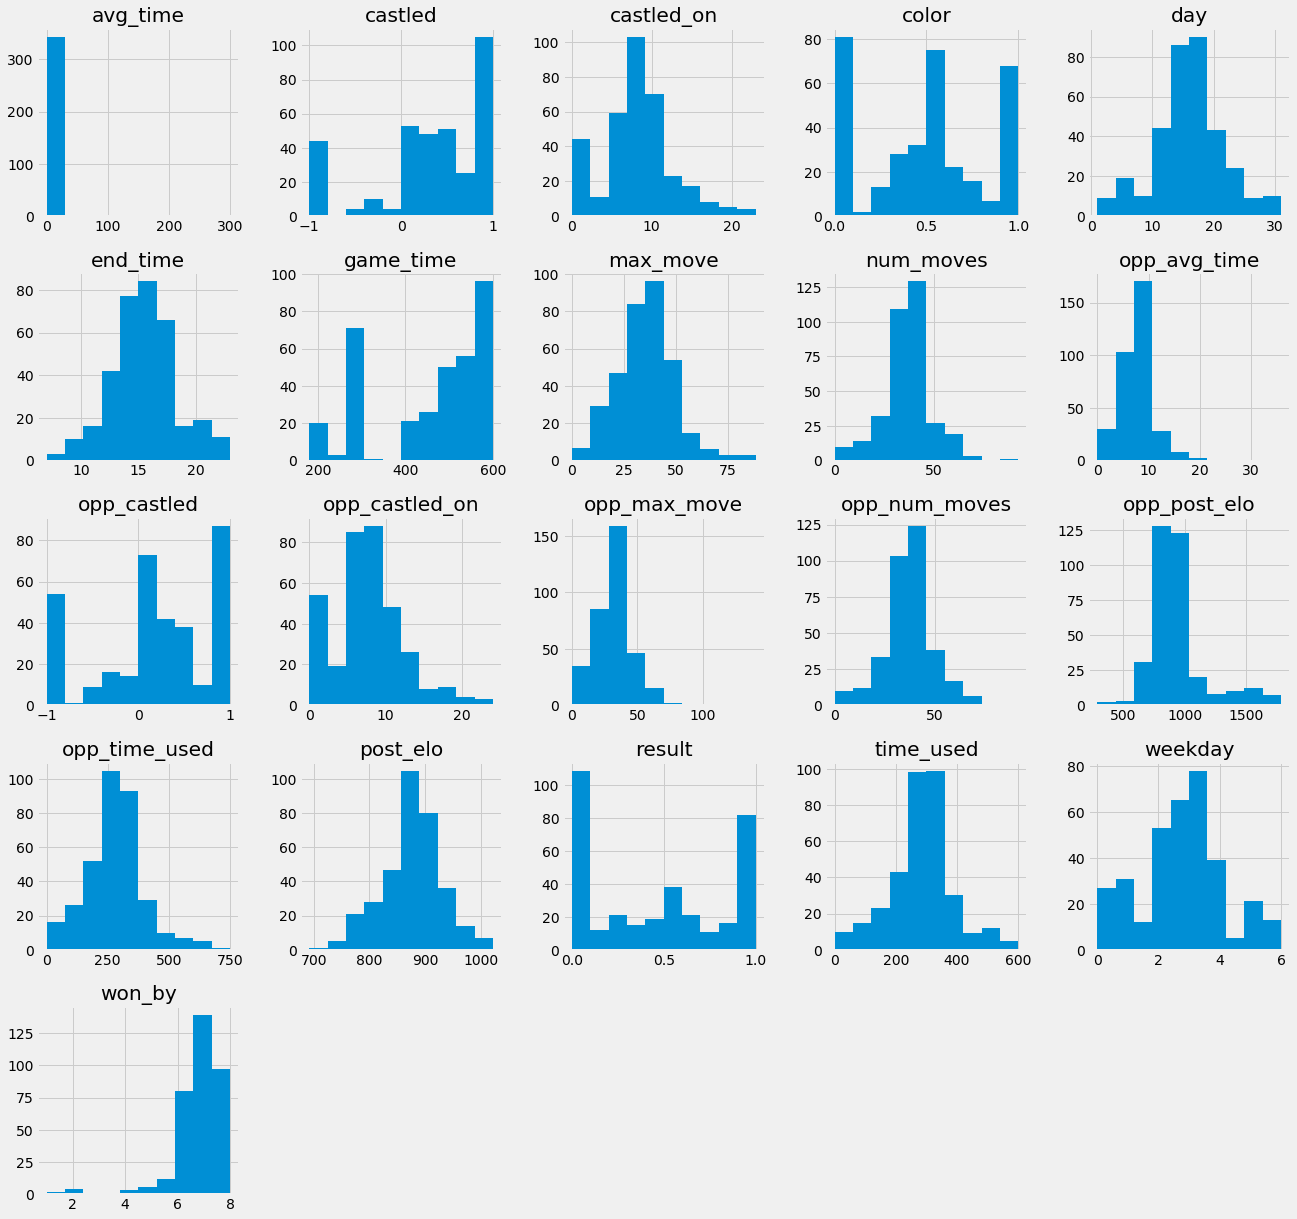

In [43]:
for num in df_mean_list:
    print(num)
    num.hist(figsize=(20,20))
    plt.show()

In [ ]:
# 2. 'result'
# 3. 'game_time'
# 4. 'end_time'
# 5. 'num_moves'
# 6. 'color'
# 7. 'won_by':
#     - checkmate = 9
#     - resignation = 8
#     - time = 7
#     - material = 6
#     - agreement = 5
#     - repetition = 4
#     - abandoned = 3
#     - stalemate = 2
#     - rule = 1
# 8. 'weekday'
# 9. 'day'
# 10. 'castled_on'
# 11. 'opp_castled_on'
# 12. 'castled'
# 13. 'opp_castled'
# 14. 'time_used'
# 15. 'opp_time_used'
# 16. 'opp_num_moves'
# 17. 'avg_time'
# 18. 'opp_avg_time'
# 19. 'max_time'
# 20. 'opp_max_time'
# 21. 'elo'
# 22. 'opp_elo'
# 23. 'diff'